# Wrangler Function

In [1]:
import pandas as pd

In [2]:
#wrangler function to ingest csv data from github repo

def wrangler(path) -> pd.DataFrame:

  df = pd.read_csv(path, skiprows=20) # Read csv file

  df.insert(0,'Date',None)

  df['Date'] = df.apply(lambda x: f"{int(x['YEAR'])}-{int(x['DOY'])}", axis=1) # Date feature engineering
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%j') # Date feature engineering
  #df.index = df['date'] # Date as index
  #df.drop(['date', 'YEAR', 'DOY'], axis=1, inplace=True) # Drop irrelevant columns

  # checks if there are missing values or duplicates
  for col in df.columns:
    if df[col].isna().any():
      print(f'{col} has {df[col].isna().sum()} missing values, please check to decide imputation or drop')
    elif df.duplicated().any():
      print(f'{col} has {df.duplicated().sum()} duplicate values, please check to decide if drop is necessary')
    else:
      continue
  df.rename(columns={'T2M':'Temperature at 2 Meters Average (C)', 'T2M_MAX':'Temperature at 2 Meters Maximum (C)',
                     'T2M_MIN':'Temperature at 2 Meters Minimum (C)', 'RH2M':'Relative Humidity at 2 Meters (%)',
                     'PRECTOTCORR': 'Precipitation Corrected (mm/day)', 'WS2M':'Wind Speed at 2 Meters Average (m/s)',
                     'WS2M_MAX':'Wind Speed at 2 Meters Maximum (m/s)','WS2M_MIN':'Wind Speed at 2 Meters Minimum (m/s)',
                     'WD2M':'Wind Direction at 2 Meters (Degrees)','GWETTOP':'Surface Soil Wetness (1)',
                     'GWETROOT':'Root Zone Soil Wetness (1)','GWETPROF':'Profile Soil Moisture (1)'}, inplace=True) # Rename column

  df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores

  print(df.shape)



  return df


# Warawa Data

###Data Source

NASA POWER Database - https://power.larc.nasa.gov/data-access-viewer/

###Github Extraction

To get the URL of a file from a GitHub repository, follow these steps:

For Raw File Links (CSV, JSON, TXT, etc.)
Go to the GitHub Repository where the file is located.

Navigate to the specific file you want to load.

Click on the file name to open it.

Click on the "Raw" button at the top right of the file preview.

Copy the URL from the browser’s address bar.

The URL should look like -


```
https://raw.githubusercontent.com/username/repository/branch/path/to/file.csv
```



In [3]:
warawa = 'https://raw.githubusercontent.com/OmdenaAI/KanoNigeriaChapter_SmartFarming/refs/heads/main/Weather_data_36_local_government_area/Southern%20Kano%20State/35.%20Warawa%2C%20S%20Kano.csv'

warawa_df = wrangler(warawa)

(4018, 15)


In [4]:
warawa_df.head()

,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
0,2014-01-01,2014,1,19.92,31.58,10.23,18.48,0.0,0.90,1.70,0.50,39.4,0.19,0.24,0.26
1,2014-01-02,2014,2,20.21,29.80,12.59,15.86,0.0,1.07,1.85,0.62,43.7,0.19,0.24,0.26
2,2014-01-03,2014,3,20.56,30.12,12.44,16.93,0.0,1.33,2.46,0.76,45.2,0.18,0.24,0.26
3,2014-01-04,2014,4,20.51,30.72,12.47,19.74,0.0,1.34,2.46,0.72,52.8,0.18,0.24,0.26
4,2014-01-05,2014,5,20.17,29.41,12.13,22.80,0.0,1.23,2.10,0.65,55.0,0.18,0.24,0.26


In [5]:
  # Insert new columns at the beginning
  warawa_df.insert(0, 'LGA Name', 'Warawa')
  warawa_df.insert(1, 'Sub-Region', 'Southern')
  warawa_df.insert(2, 'Latitude', 11.9067)
  warawa_df.insert(3, 'Longitude', 8.7724)

In [6]:
warawa_df.head()

,LGA Name,Sub-Region,Latitude,Longitude,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
0,Warawa,Southern,11.9067,8.7724,2014-01-01,2014,1,19.92,31.58,10.23,18.48,0.0,0.90,1.70,0.50,39.4,0.19,0.24,0.26
1,Warawa,Southern,11.9067,8.7724,2014-01-02,2014,2,20.21,29.80,12.59,15.86,0.0,1.07,1.85,0.62,43.7,0.19,0.24,0.26
2,Warawa,Southern,11.9067,8.7724,2014-01-03,2014,3,20.56,30.12,12.44,16.93,0.0,1.33,2.46,0.76,45.2,0.18,0.24,0.26
3,Warawa,Southern,11.9067,8.7724,2014-01-04,2014,4,20.51,30.72,12.47,19.74,0.0,1.34,2.46,0.72,52.8,0.18,0.24,0.26
4,Warawa,Southern,11.9067,8.7724,2014-01-05,2014,5,20.17,29.41,12.13,22.80,0.0,1.23,2.10,0.65,55.0,0.18,0.24,0.26


###Inspecting Data

In [7]:
#first 10 observations

warawa_df.head(10)

,LGA Name,Sub-Region,Latitude,Longitude,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
0,Warawa,Southern,11.9067,8.7724,2014-01-01,2014,1,19.92,31.58,10.23,18.48,0.0,0.90,1.70,0.50,39.4,0.19,0.24,0.26
1,Warawa,Southern,11.9067,8.7724,2014-01-02,2014,2,20.21,29.80,12.59,15.86,0.0,1.07,1.85,0.62,43.7,0.19,0.24,0.26
2,Warawa,Southern,11.9067,8.7724,2014-01-03,2014,3,20.56,30.12,12.44,16.93,0.0,1.33,2.46,0.76,45.2,0.18,0.24,0.26
3,Warawa,Southern,11.9067,8.7724,2014-01-04,2014,4,20.51,30.72,12.47,19.74,0.0,1.34,2.46,0.72,52.8,0.18,0.24,0.26
4,Warawa,Southern,11.9067,8.7724,2014-01-05,2014,5,20.17,29.41,12.13,22.80,0.0,1.23,2.10,0.65,55.0,0.18,0.24,0.26
5,Warawa,Southern,11.9067,8.7724,2014-01-06,2014,6,19.96,29.13,13.14,24.67,0.0,1.28,2.22,0.69,59.8,0.19,0.24,0.26
6,Warawa,Southern,11.9067,8.7724,2014-01-07,2014,7,20.46,30.48,12.45,24.61,0.0,1.27,2.44,0.71,64.7,0.19,0.24,0.26
7,Warawa,Southern,11.9067,8.7724,2014-01-08,2014,8,20.77,30.83,12.34,24.69,0.0,1.33,2.42,0.75,55.1,0.19,0.24,0.26
8,Warawa,Southern,11.9067,8.7724,2014-01-09,2014,9,20.48,30.48,12.03,21.93,0.0,1.34,2.26,0.77,58.8,0.19,0.24,0.26
9,Warawa,Southern,11.9067,8.7724,2014-01-10,2014,10,20.38,29.59,12.96,22.86,0.0,1.54,2.52,0.91,58.4,0.18,0.24,0.26


In [8]:
#last 10 observations

warawa_df.tail(10)

,LGA Name,Sub-Region,Latitude,Longitude,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
4008,Warawa,Southern,11.9067,8.7724,2024-12-22,2024,357,16.80,25.45,9.99,48.13,0.0,1.08,1.94,0.53,54.7,0.34,0.33,0.38
4009,Warawa,Southern,11.9067,8.7724,2024-12-23,2024,358,17.98,28.34,10.10,46.49,0.0,1.00,1.97,0.58,54.8,0.33,0.33,0.38
4010,Warawa,Southern,11.9067,8.7724,2024-12-24,2024,359,18.35,29.75,9.32,46.37,0.0,0.93,1.73,0.57,58.2,0.33,0.33,0.37
4011,Warawa,Southern,11.9067,8.7724,2024-12-25,2024,360,18.08,29.70,8.82,44.41,0.0,0.87,1.55,0.50,56.5,0.33,0.33,0.37
4012,Warawa,Southern,11.9067,8.7724,2024-12-26,2024,361,17.29,28.87,8.32,39.17,0.0,1.09,2.06,0.61,53.7,0.32,0.33,0.37
4013,Warawa,Southern,11.9067,8.7724,2024-12-27,2024,362,16.39,27.71,7.66,41.28,0.0,1.06,1.92,0.63,52.6,0.32,0.33,0.37
4014,Warawa,Southern,11.9067,8.7724,2024-12-28,2024,363,17.33,29.54,7.27,42.18,0.0,1.01,1.82,0.55,68.5,0.32,0.33,0.37
4015,Warawa,Southern,11.9067,8.7724,2024-12-29,2024,364,19.01,29.99,10.75,41.41,0.0,1.08,1.86,0.58,64.4,0.31,0.33,0.37
4016,Warawa,Southern,11.9067,8.7724,2024-12-30,2024,365,20.35,31.35,11.20,41.82,0.0,1.00,1.76,0.49,66.3,0.31,0.32,0.37
4017,Warawa,Southern,11.9067,8.7724,2024-12-31,2024,366,21.17,31.72,12.92,40.45,0.0,1.17,1.91,0.62,72.6,0.31,0.32,0.36


In [9]:
#data types and missing values

warawa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   LGA Name                              4018 non-null   object        
 1   Sub-Region                            4018 non-null   object        
 2   Latitude                              4018 non-null   float64       
 3   Longitude                             4018 non-null   float64       
 4   Date                                  4018 non-null   datetime64[ns]
 5   YEAR                                  4018 non-null   int64         
 6   DOY                                   4018 non-null   int64         
 7   Temperature_at_2_Meters_Average_(C)   4018 non-null   float64       
 8   Temperature_at_2_Meters_Maximum_(C)   4018 non-null   float64       
 9   Temperature_at_2_Meters_Minimum_(C)   4018 non-null   float64       
 10  

I have collected data for the 36 local govt areas + Kano Metropolitan Area. Data has been collected for 11 years from 2014-2024.

I have included the following parameters from the NASA POWER database:

1. Temp-avg - The average air (dry bulb) temperature at 2 meters above the surface of the earth.

2. Temp-max - The maximum hourly air (dry bulb) temperature at 2 meters above the surface of the earth in the period of interest.

3. Temp-min - The minimum hourly air (dry bulb) temperature at 2 meters above the surface of the earth in the period of interest.

4. Relative humidity at 2 meters

5. Precipitation

6. Wind speed at 2 meters avg

7. Wind speed at 2 meters max

8. Wind speed at 2 meters min

9. Wind direction at 2 meters

10. Surface soil wetness - The amount of water and water vapor present in the soil. Top indicates the upper 5 cm of soil. Values range from 0 for completely dry conditions to 1 for completely saturated soil.

11. Root zone soil wetness - The amount of water and water vapor available to plants in the root zone, generally considered to be the upper 200 cm of soil, expressed as the proportion of water present in a given amount of soil. Values range from 0 for completely dry conditions to 1 for completely saturated soil.

12. Profile soil moisture - The amount of water and water vapor present in the soil. Profile indicates the layer from the surface down to the bedrock. Values range from 0 for completely dry conditions to 1 for completely saturated soil

In [10]:
#summary statistics

warawa_df.describe()

,Latitude,Longitude,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
count,4.018000e+03,4.018000e+03,4018,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,1.190670e+01,8.772400e+00,2019-07-02 11:59:59.999999744,2019.000747,183.136635,26.427071,34.753051,19.624375,45.376842,2.069950,0.832917,1.435660,0.384818,135.511772,0.307006,0.311247,0.335687
min,1.190670e+01,8.772400e+00,2014-01-01 00:00:00,2014.000000,1.000000,13.180000,18.830000,5.880000,6.260000,0.000000,0.100000,0.210000,0.000000,0.100000,0.110000,0.200000,0.210000
25%,1.190670e+01,8.772400e+00,2016-10-01 06:00:00,2016.000000,92.000000,23.862500,31.782500,15.685000,25.460000,0.000000,0.452500,0.780000,0.150000,55.600000,0.190000,0.230000,0.250000
50%,1.190670e+01,8.772400e+00,2019-07-02 12:00:00,2019.000000,183.000000,26.820000,34.770000,21.475000,44.490000,0.000000,0.840000,1.450000,0.360000,85.900000,0.260000,0.270000,0.290000
75%,1.190670e+01,8.772400e+00,2022-04-01 18:00:00,2022.000000,274.000000,29.597500,37.970000,23.250000,64.020000,0.790000,1.140000,2.000000,0.570000,228.500000,0.400000,0.350000,0.370000
max,1.190670e+01,8.772400e+00,2024-12-31 00:00:00,2024.000000,366.000000,35.180000,44.180000,29.010000,94.770000,181.370000,2.330000,3.460000,1.680000,359.900000,0.890000,0.910000,0.940000
std,4.157192e-13,8.190024e-13,NaN,3.162868,105.458353,4.236137,4.176937,4.918759,22.044680,8.845143,0.427648,0.733266,0.253836,93.797296,0.155098,0.115812,0.132502


**SUMMARY STATISTICS**

<br>

Temperature:

The average temperature has a mean value of 26.4°C, with a minimum of 13.2°C and a maximum of 35.2°C.
The minimum record temp is 5.9°C and the maximum recorded temperature 44.2°C, showing a significant range.

<br>

Humidity:

Mean Relative Humidity: 45.4%
Min Humidity: 6.3% (very dry)
Max Humidity: 100% (extremely humid)

<br>

Precipitation:

Mean precipitation per day: 2.07 mm
Max precipitation: 181.4 mm, indicating occasional heavy rainfall.

<br>

Wind Speed:

The average wind speed has a mean of 0.83 m/s
Maximum wind speed can go as high as 3.46 m/s

<br>

Soil Moisture:

Surface soil wetness is around 0.31 on average, with the minimum as 0.11 (very dry) and max as 0.89 (very wet).

Root Zone Wetness and Profile Soil Moisture have similar distributions, and seem to be wetter than the surface soil, on average.

In [11]:
warawa_df.to_csv('Warawa_South_Kano_cleaned.csv', encoding = 'utf-8-sig')

###Downloading Dataframe as CSV

In [12]:
# transfer warawa_df to a CSV and download it
'''
from google.colab import files
warawa_df.to_csv('Warawa_South_Kano_cleaned.csv', encoding = 'utf-8-sig')
files.download('Warawa_South_Kano_cleaned.csv')
'''

"\nfrom google.colab import files\nwarawa_df.to_csv('Warawa_South_Kano_cleaned.csv', encoding = 'utf-8-sig')\nfiles.download('Warawa_South_Kano_cleaned.csv')\n"

### Map Visualisation

In [13]:
import folium

# Create a map centered at an average location
m = folium.Map(location=[12.0, 8.5167], zoom_start=5)  # Change to your region

# List of coordinates (latitude, longitude, name)
locations = [(11.9067,8.7724,'Warawa')]

# Add markers to the map
for lat, lon, name in locations:
    folium.Marker(location=[lat, lon], popup=name, tooltip=name).add_to(m)

# Display the map directly in the notebook (no HTML file needed)
m

# Exploratory Data Analysis

###Correlation Matrices

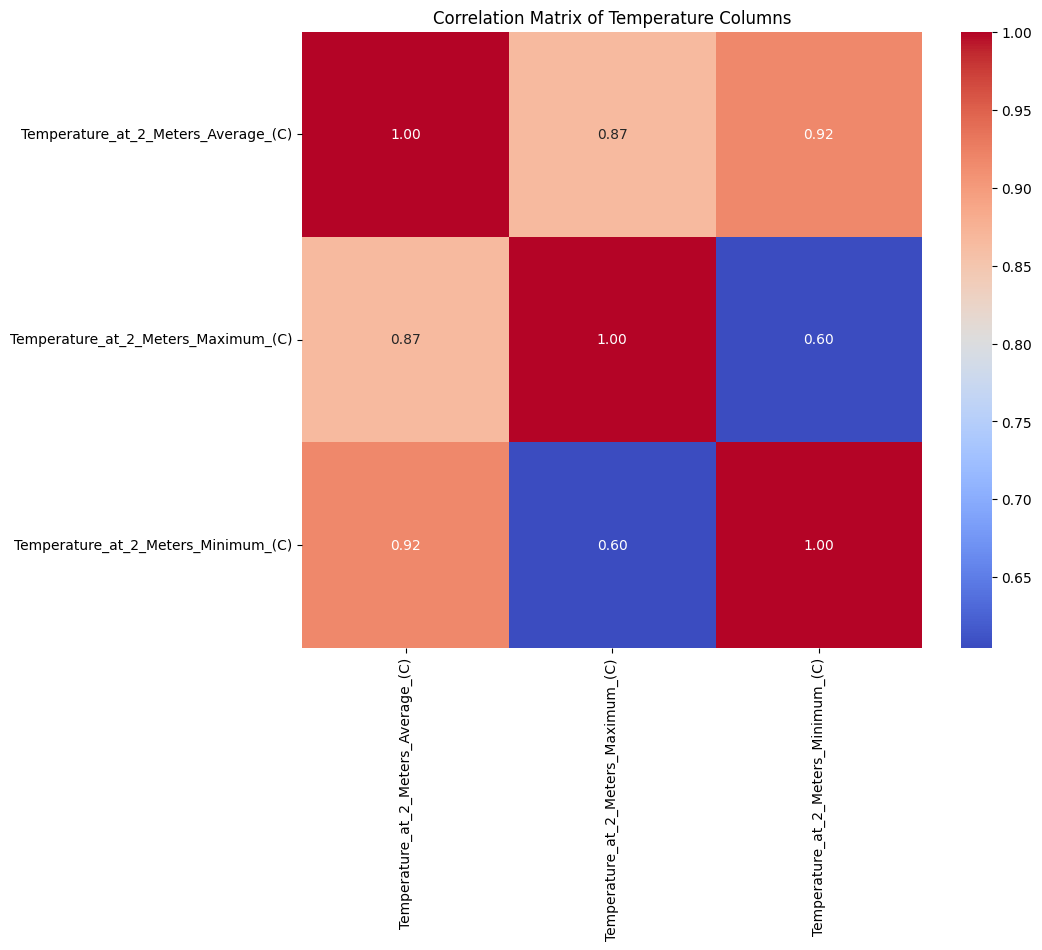

In [14]:
# correlation plot for columns with temperature

import matplotlib.pyplot as plt
import seaborn as sns


# Select columns related to temperature
temperature_cols = [col for col in warawa_df.columns if 'Temperature' in col]

# Create the correlation matrix
correlation_matrix = warawa_df[temperature_cols].corr()

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperature Columns')
plt.show()


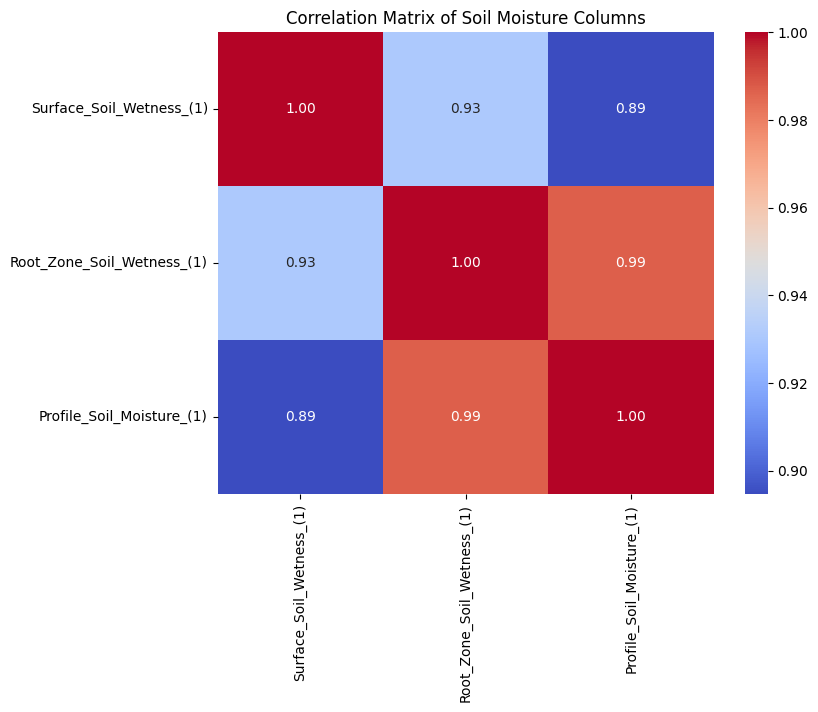

In [15]:
# correlation plot for columns with soil moisture - surface, root and profile

import matplotlib.pyplot as plt
# Select columns related to soil moisture
soil_moisture_cols = ['Surface_Soil_Wetness_(1)', 'Root_Zone_Soil_Wetness_(1)', 'Profile_Soil_Moisture_(1)']

# Create the correlation matrix
correlation_matrix = warawa_df[soil_moisture_cols].corr()

# Create the correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Soil Moisture Columns')
plt.show()


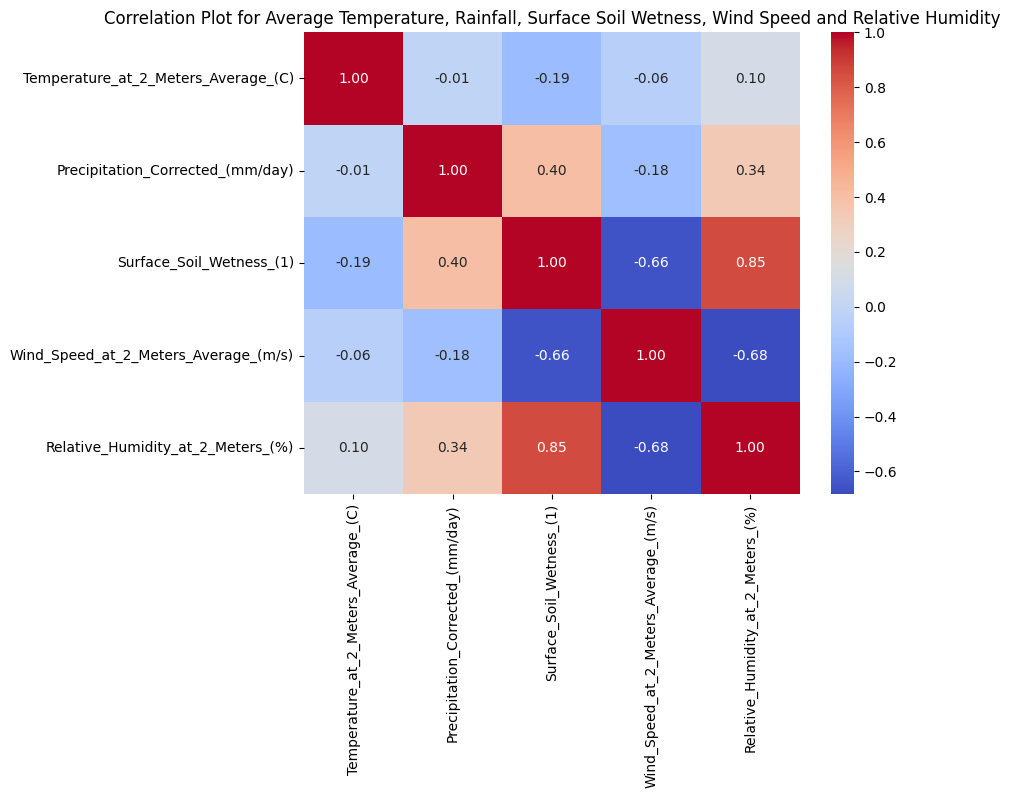

In [16]:
# correlation plot for average temp, rainfall, relative humidity and surface soil wetness

import matplotlib.pyplot as plt
# Select relevant columns for the correlation plot
cols_for_correlation = ['Temperature_at_2_Meters_Average_(C)', 'Precipitation_Corrected_(mm/day)', 'Surface_Soil_Wetness_(1)','Wind_Speed_at_2_Meters_Average_(m/s)','Relative_Humidity_at_2_Meters_(%)']

# Create the correlation matrix
correlation_matrix = warawa_df[cols_for_correlation].corr()

# Create the correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Average Temperature, Rainfall, Surface Soil Wetness, Wind Speed and Relative Humidity')
plt.show()


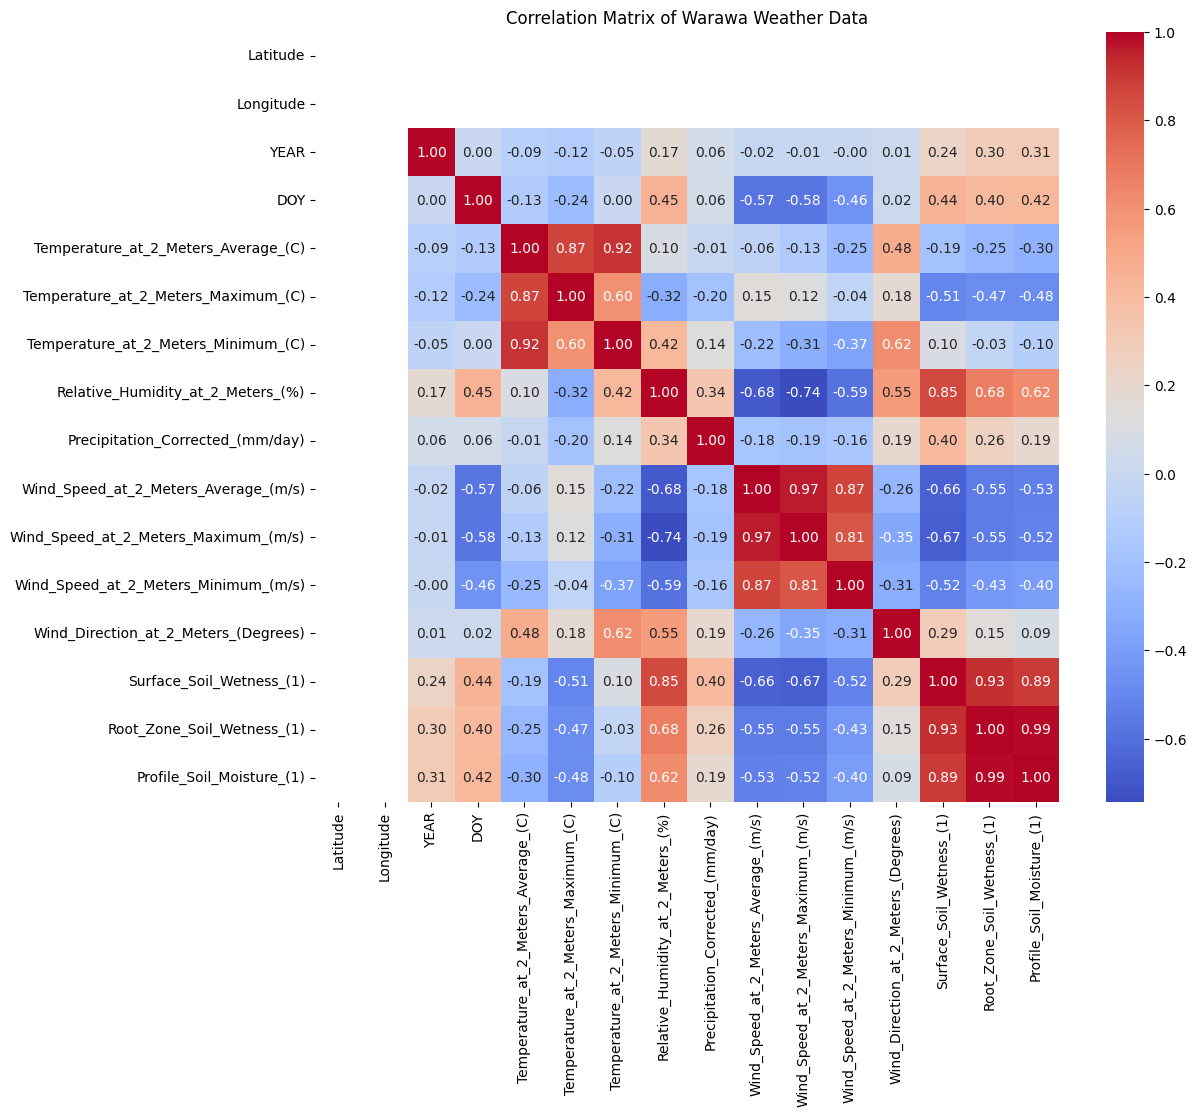

In [17]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_warawa_df = warawa_df.select_dtypes(include=['number'])
sns.heatmap(numeric_warawa_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Warawa Weather Data')
plt.show()

Noteworthy Correlation Matrix Takeaways:

<br>

Precipitation
- Low negative correlation with max temp
- Low negative correlation with wind speed
- Moderate positive correlation with soil moisture
- Higher positive correlation with surface soil moisture than with relative humidity


<br>

Soil Moisture (SM)

- Moderately negatively correlated with wind speed
- Moderately negatively correlated with temperature (esp max temp)
- More highly positively correlated with relative humidity than with precipitation

###Distributions (Histograms)

In [18]:
warawa_df.columns

Index(['LGA Name', 'Sub-Region', 'Latitude', 'Longitude', 'Date', 'YEAR',
       'DOY', 'Temperature_at_2_Meters_Average_(C)',
       'Temperature_at_2_Meters_Maximum_(C)',
       'Temperature_at_2_Meters_Minimum_(C)',
       'Relative_Humidity_at_2_Meters_(%)', 'Precipitation_Corrected_(mm/day)',
       'Wind_Speed_at_2_Meters_Average_(m/s)',
       'Wind_Speed_at_2_Meters_Maximum_(m/s)',
       'Wind_Speed_at_2_Meters_Minimum_(m/s)',
       'Wind_Direction_at_2_Meters_(Degrees)', 'Surface_Soil_Wetness_(1)',
       'Root_Zone_Soil_Wetness_(1)', 'Profile_Soil_Moisture_(1)'],
      dtype='object')

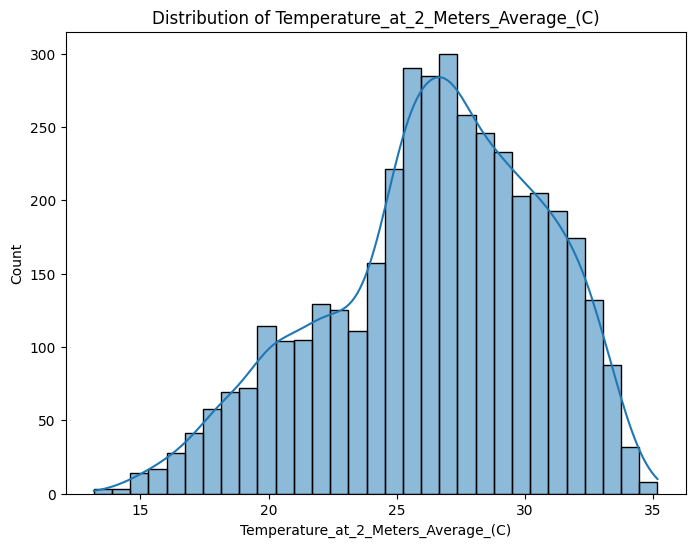

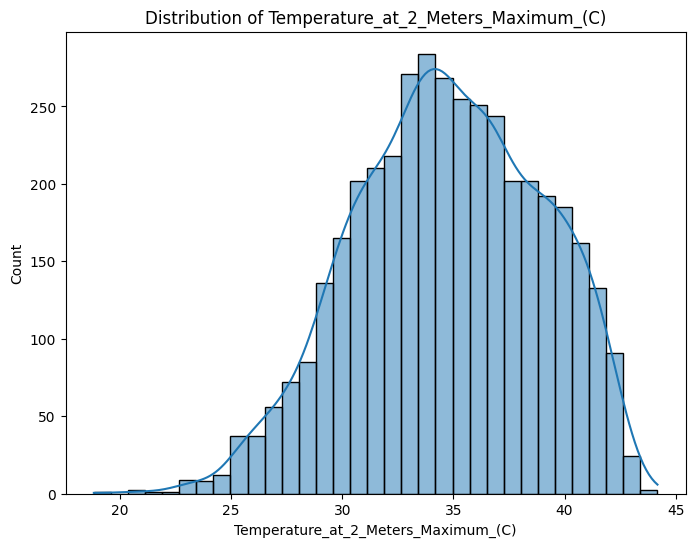

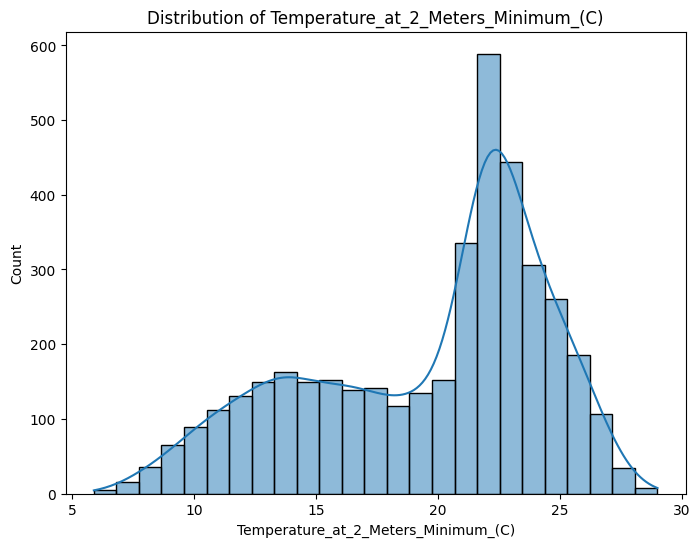

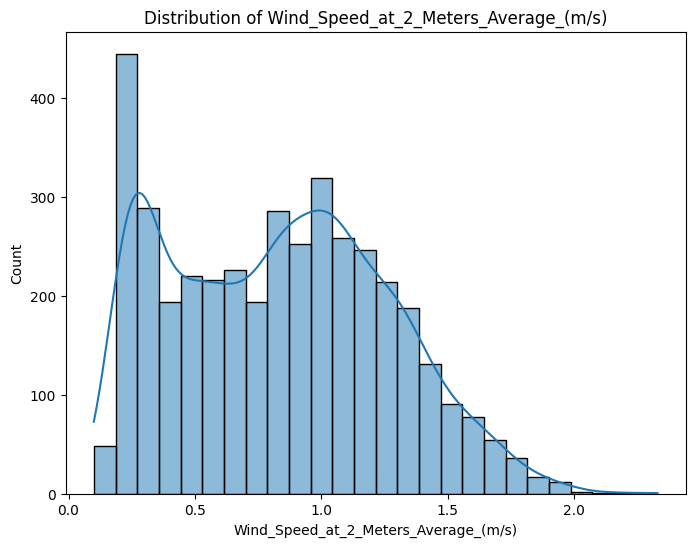

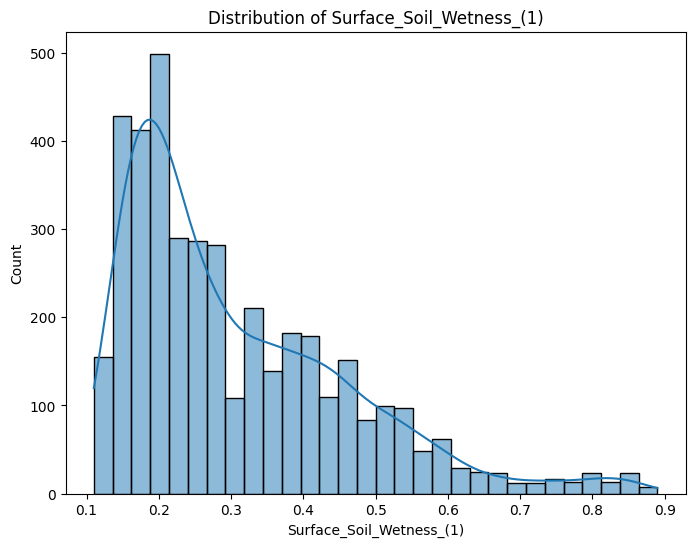

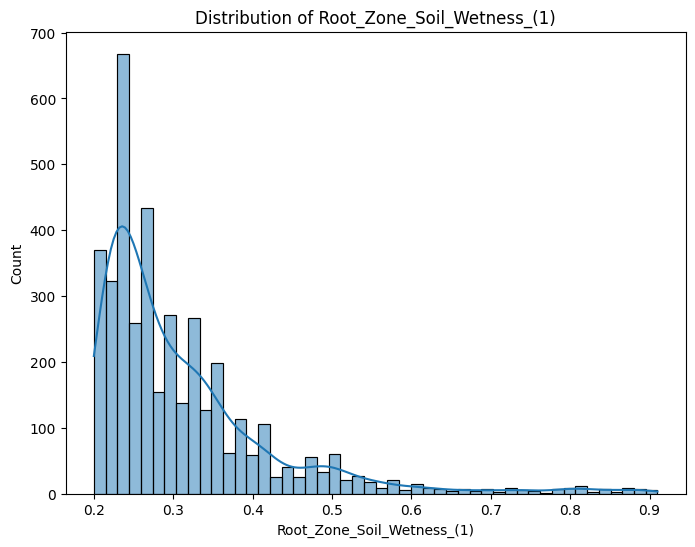

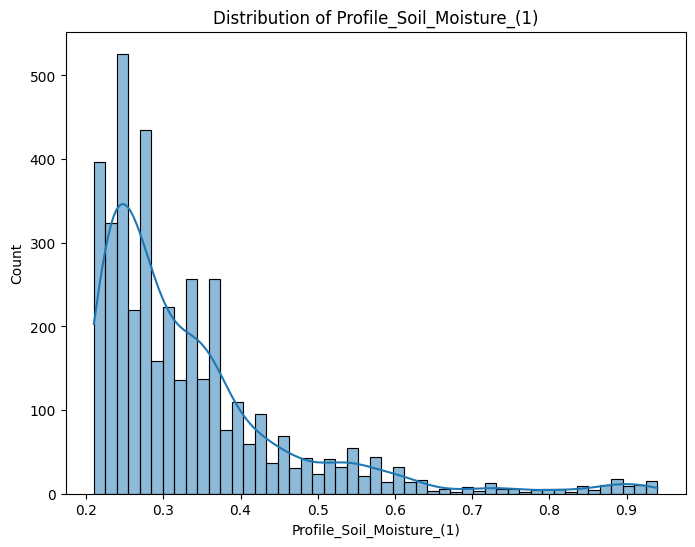

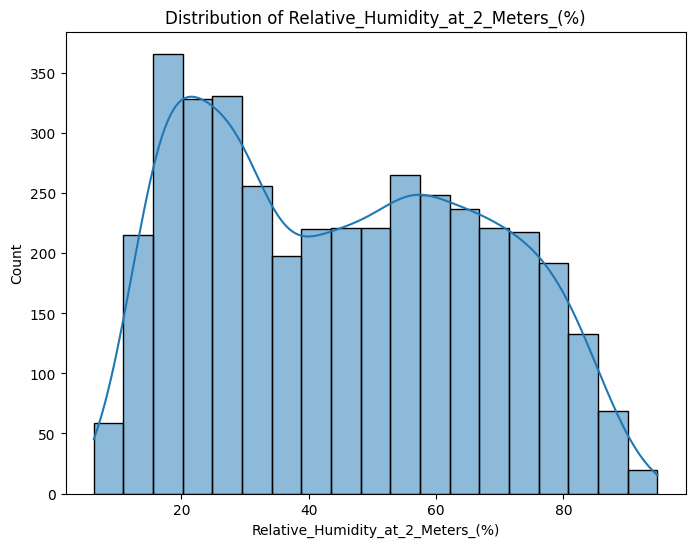

In [19]:
# Histograms for key variables

numerical_cols = ['Temperature_at_2_Meters_Average_(C)','Temperature_at_2_Meters_Maximum_(C)','Temperature_at_2_Meters_Minimum_(C)','Wind_Speed_at_2_Meters_Average_(m/s)','Surface_Soil_Wetness_(1)','Root_Zone_Soil_Wetness_(1)','Profile_Soil_Moisture_(1)','Relative_Humidity_at_2_Meters_(%)']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(warawa_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

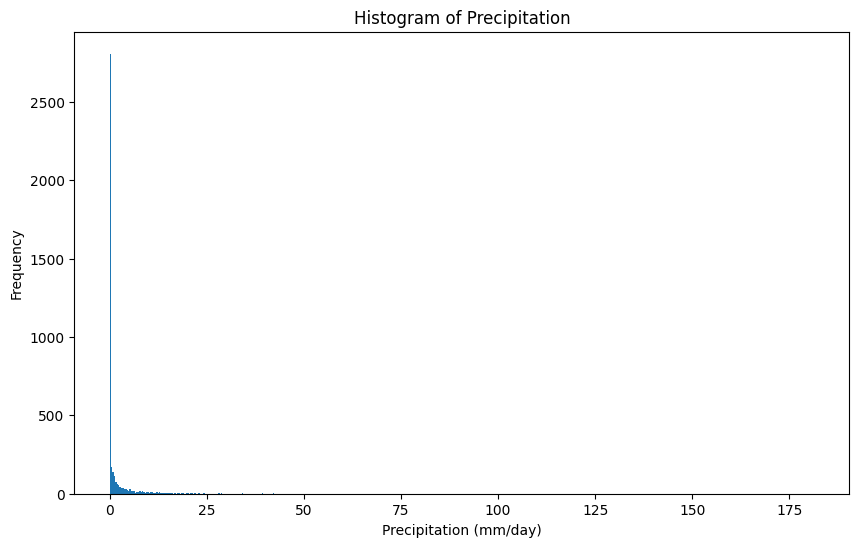

In [20]:
# histogram plot for precipitation

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(warawa_df['Precipitation_Corrected_(mm/day)'],bins=500)
plt.title('Histogram of Precipitation')
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Frequency')
plt.show()


###Time Series Plots


In [21]:
numerical_cols = ['Temperature_at_2_Meters_Average_(C)','Temperature_at_2_Meters_Maximum_(C)','Temperature_at_2_Meters_Minimum_(C)','Precipitation_Corrected_(mm/day)','Wind_Speed_at_2_Meters_Average_(m/s)','Surface_Soil_Wetness_(1)','Root_Zone_Soil_Wetness_(1)','Profile_Soil_Moisture_(1)','Wind_Direction_at_2_Meters_(Degrees)','Relative_Humidity_at_2_Meters_(%)']

####Over 11 Years

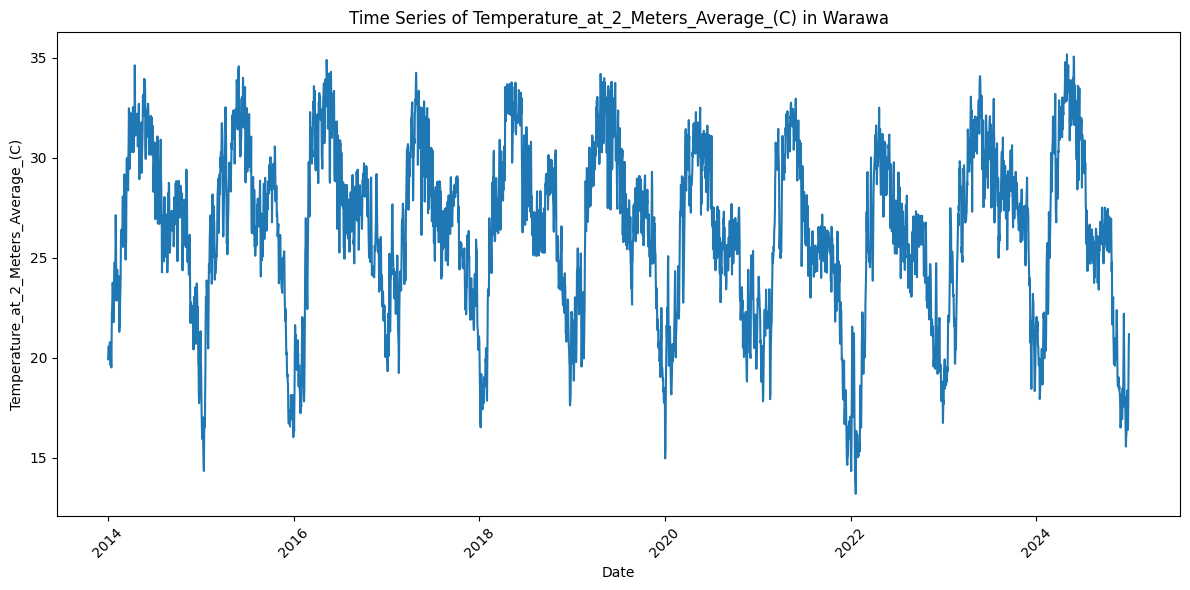

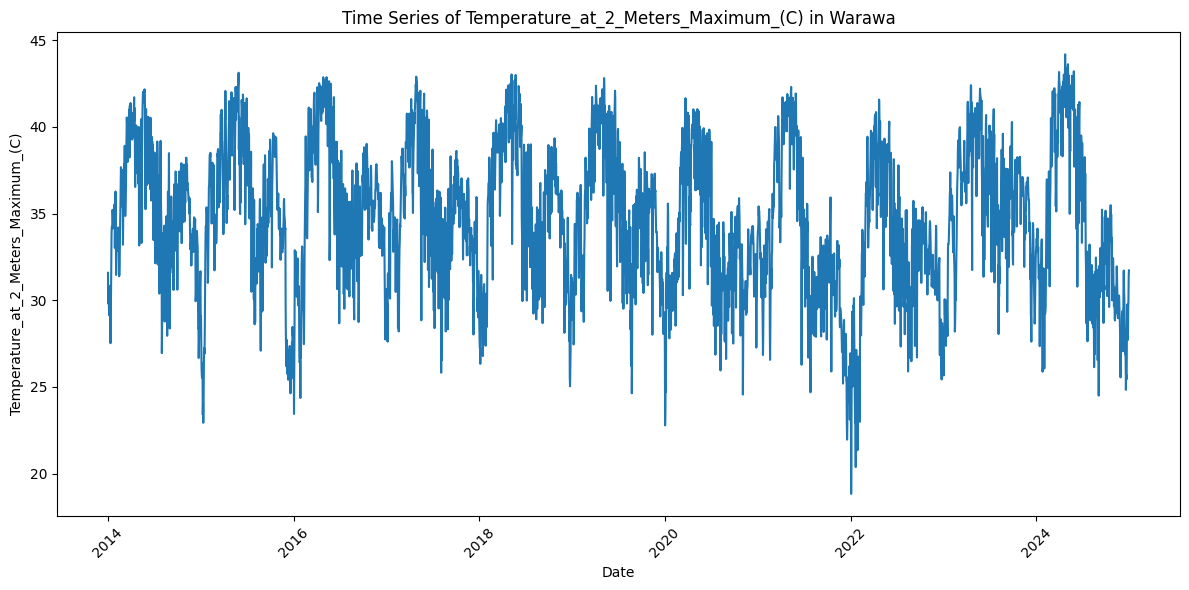

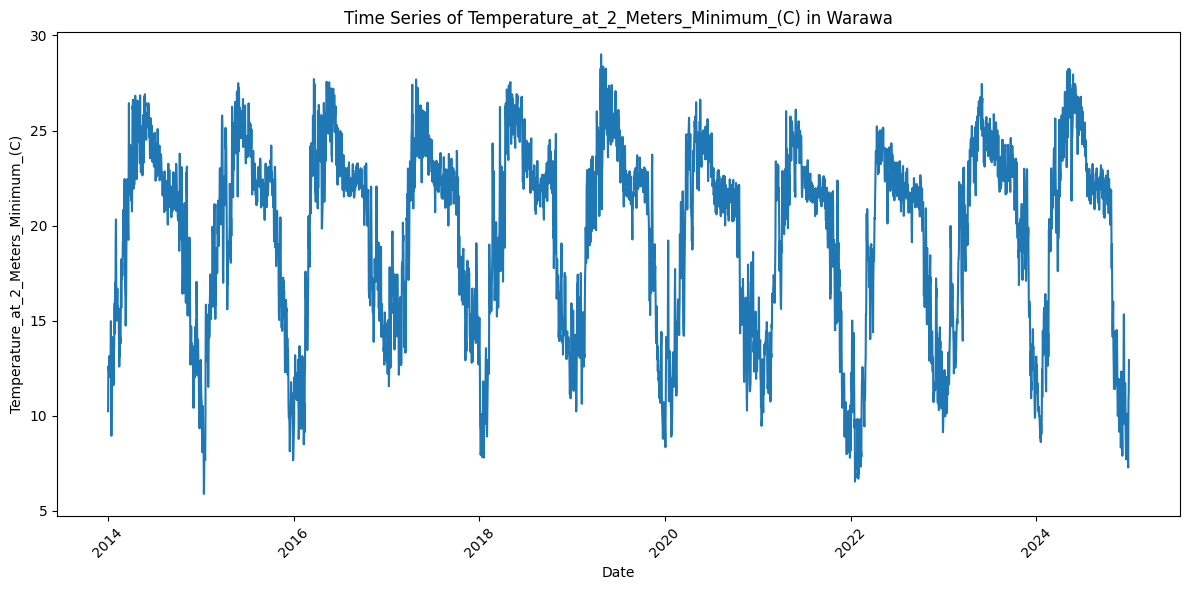

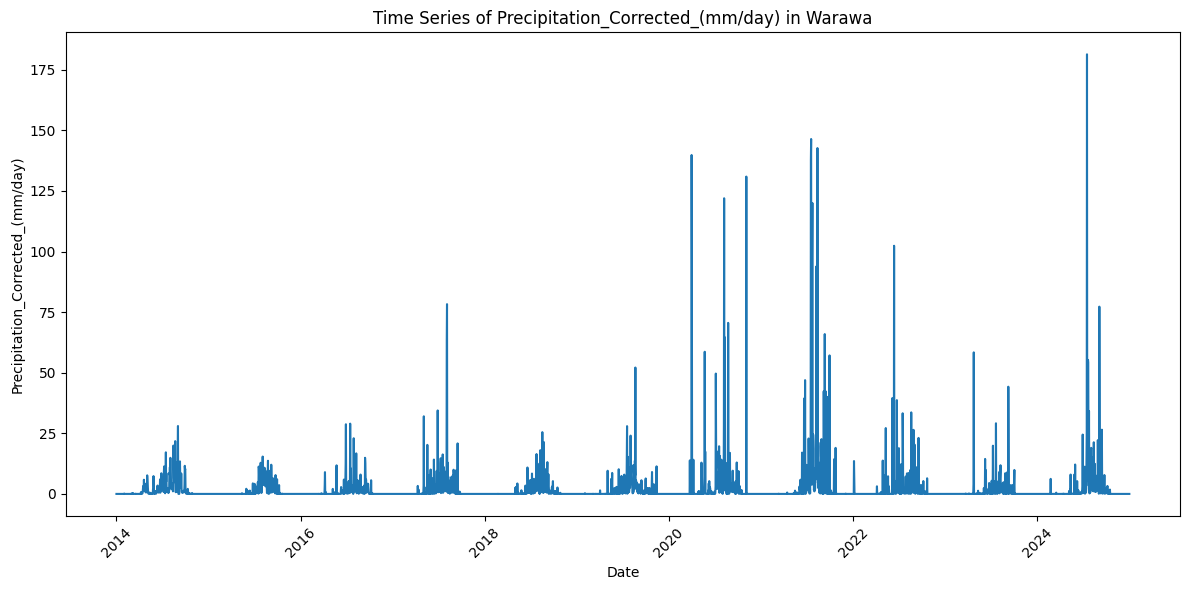

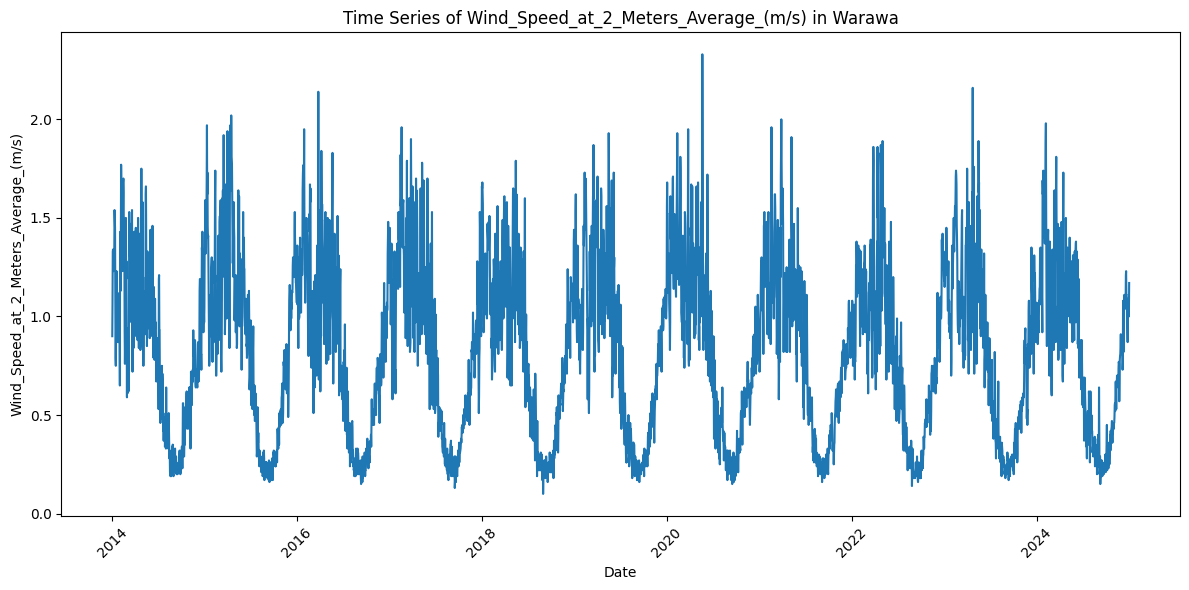

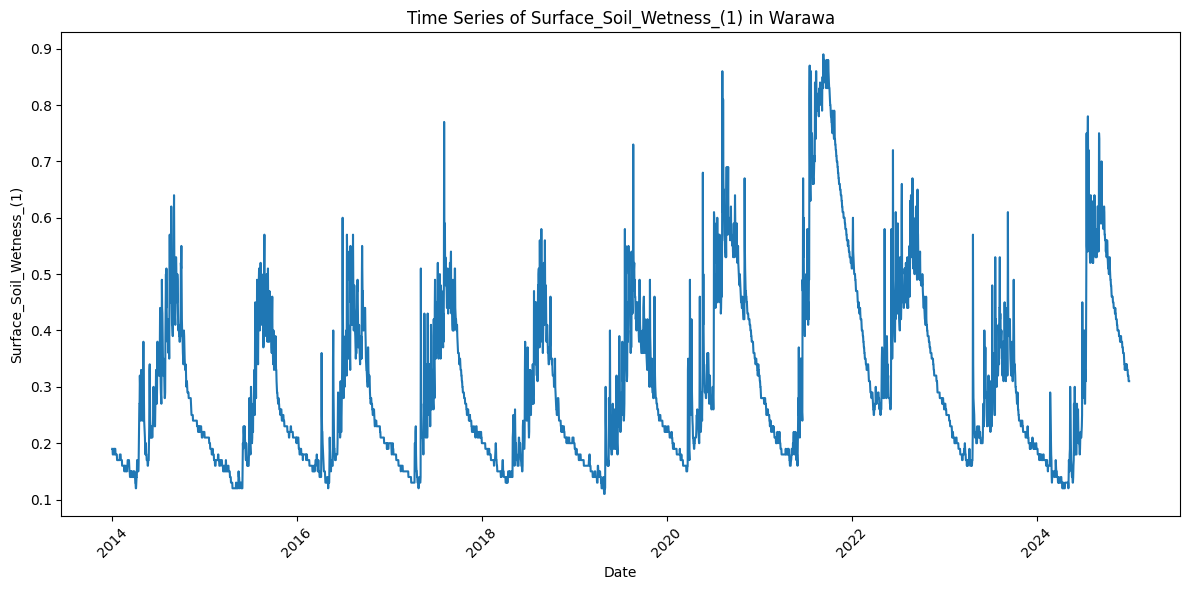

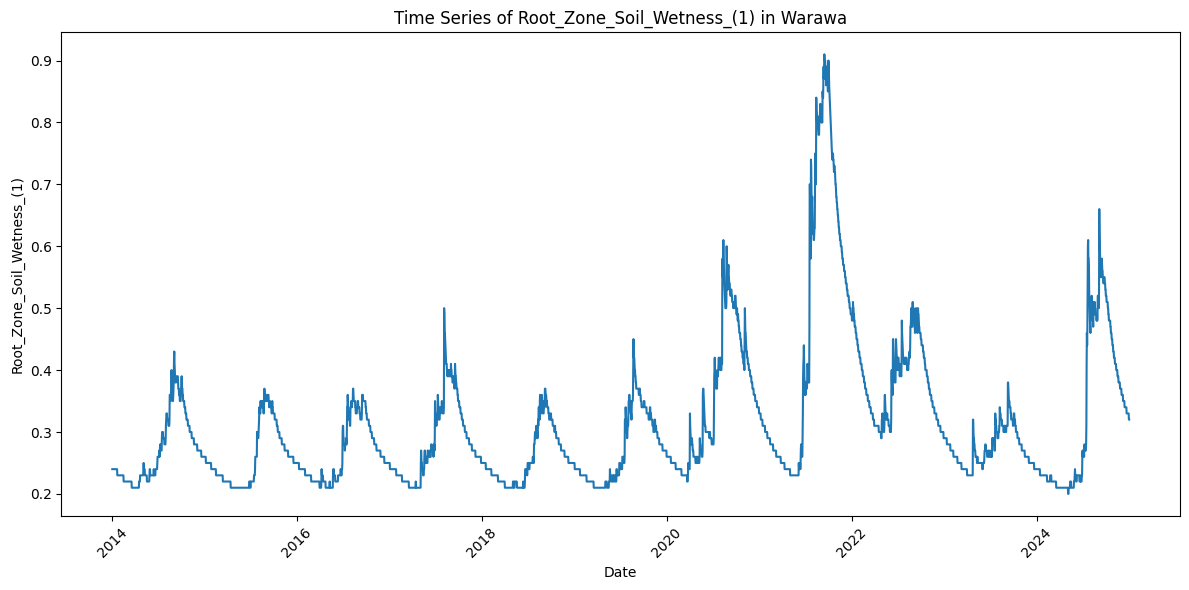

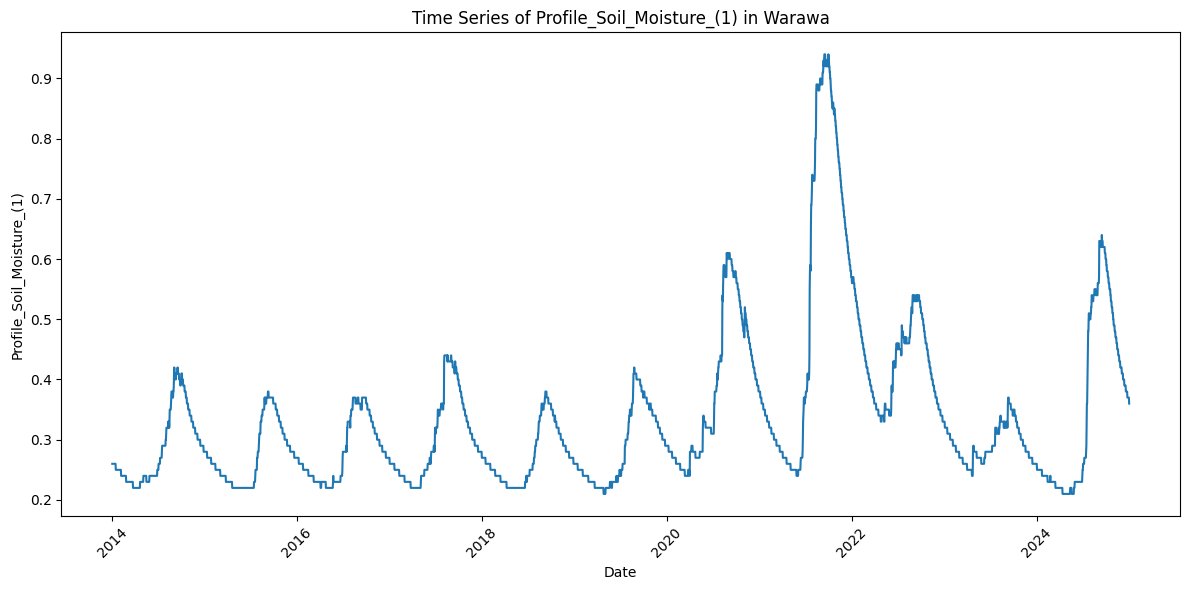

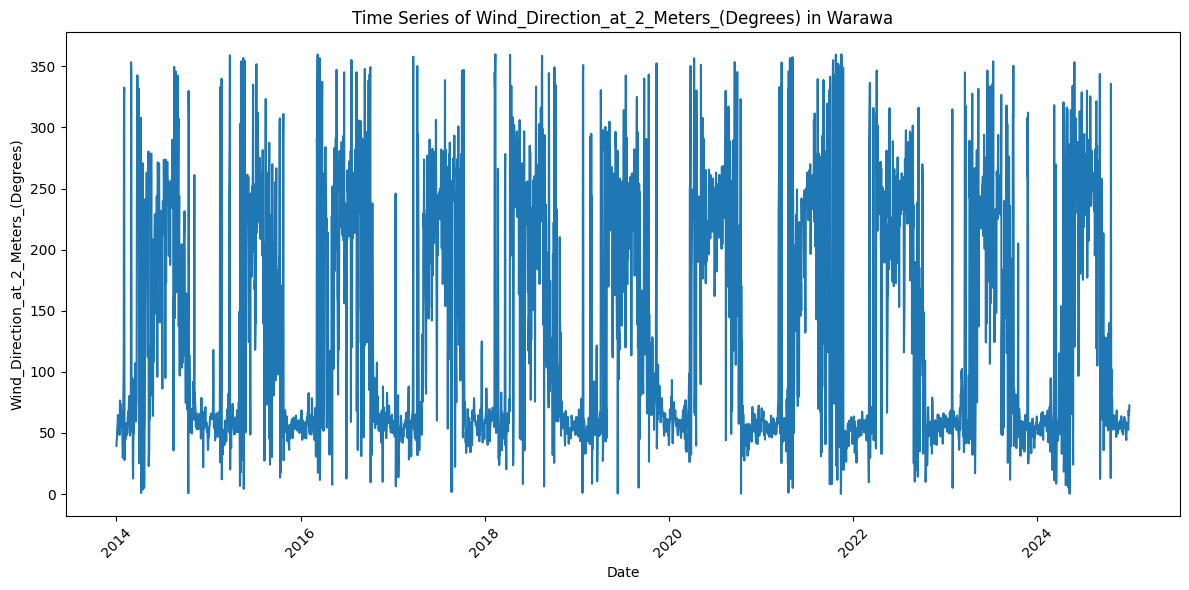

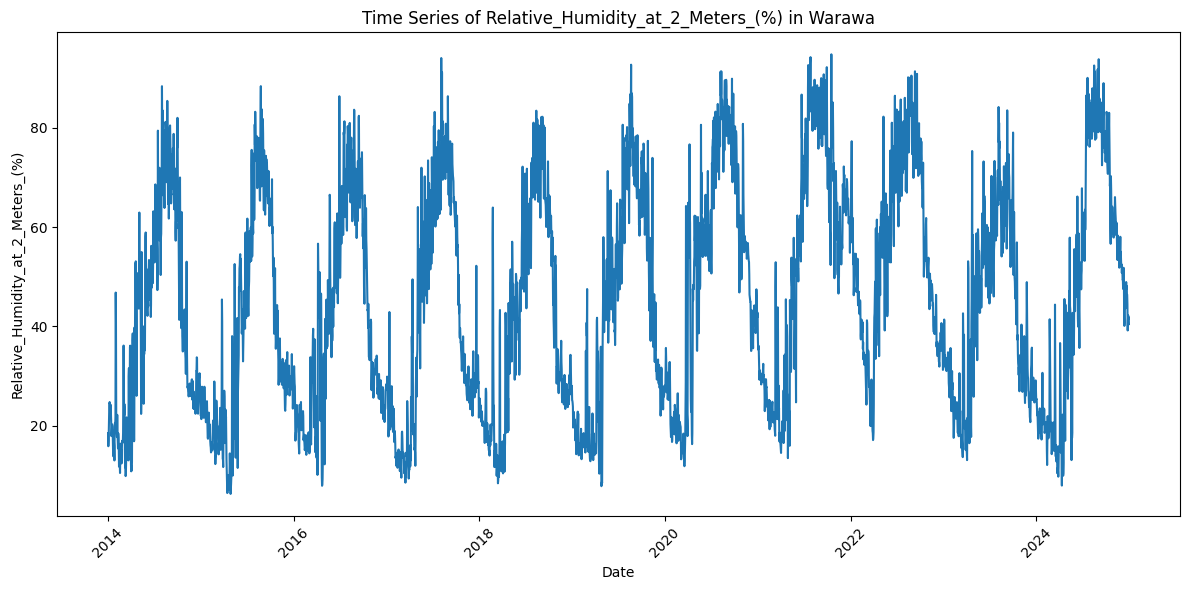

In [22]:
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(warawa_df['Date'], warawa_df[col])
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(f'Time Series of {col} in Warawa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

####For an Average Year

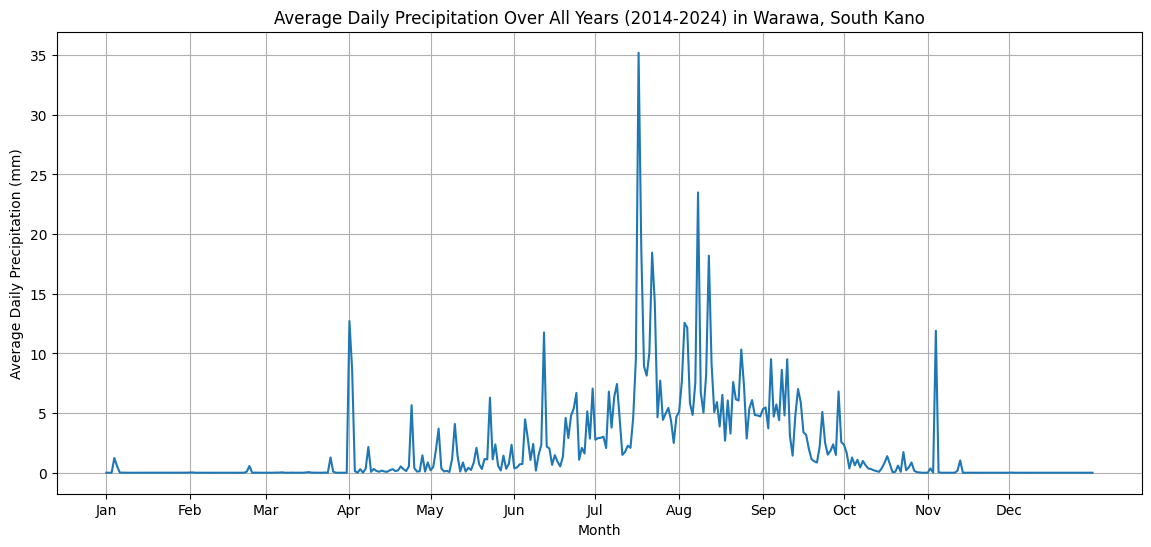

In [25]:
# time series plot of daily precipitation where precipitation on each day has been averaged out over all the years

import matplotlib.pyplot as plt

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_precip.index, daily_avg_precip.values)

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)


plt.xlabel('Month')
plt.ylabel('Average Daily Precipitation (mm)')
plt.title('Average Daily Precipitation Over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.show()


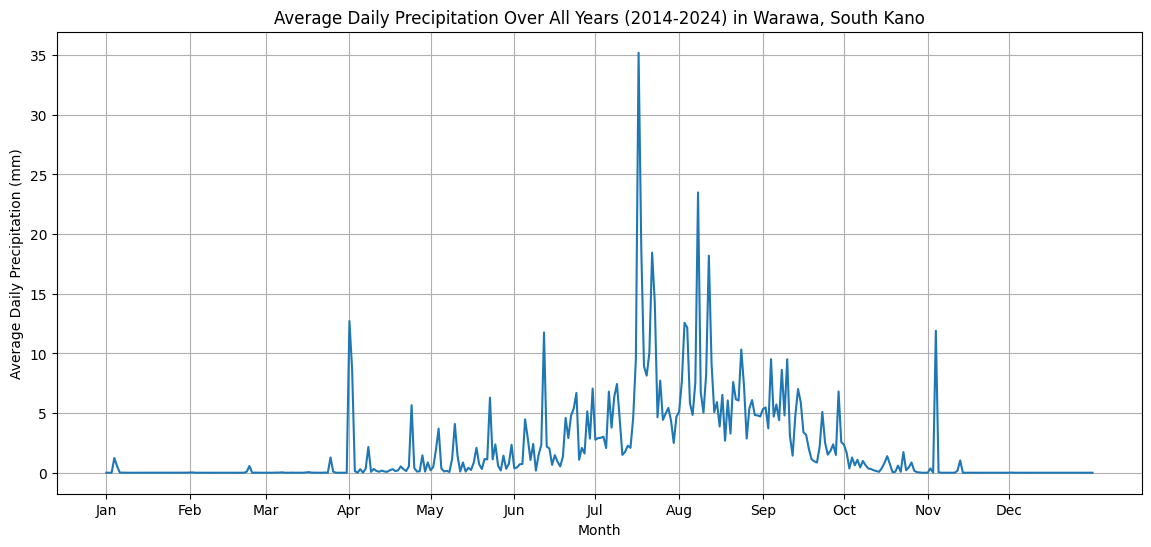

In [26]:
# time series plot of daily precipitation where precipitation on each day has been averaged out over all the years

import matplotlib.pyplot as plt

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_precip.index, daily_avg_precip.values)

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)


plt.xlabel('Month')
plt.ylabel('Average Daily Precipitation (mm)')
plt.title('Average Daily Precipitation Over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.show()


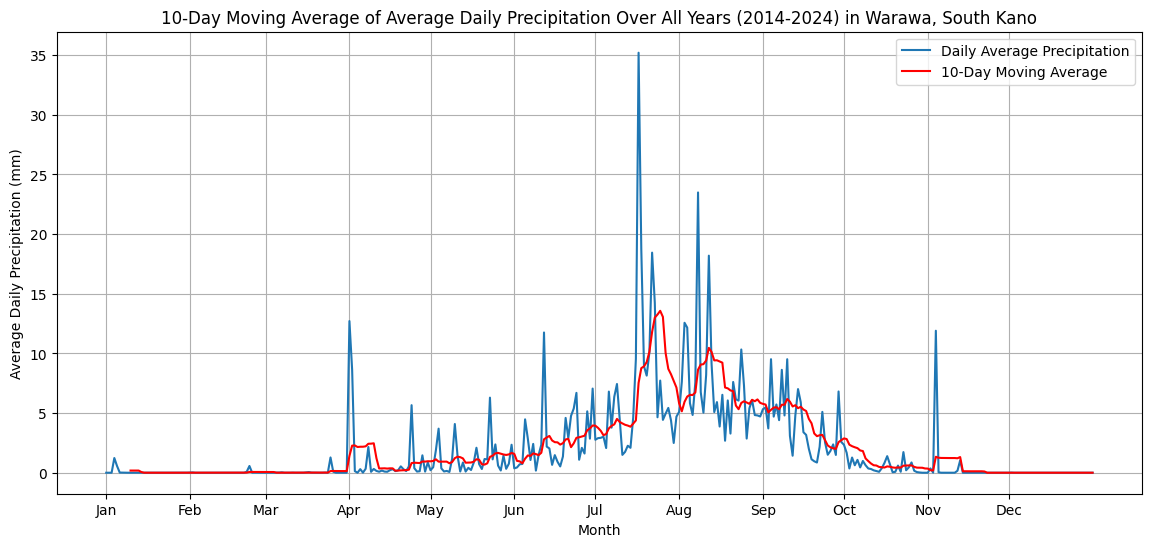

In [27]:
# prompt: give 10 day moving average plot of daily_avg_precip series

import matplotlib.pyplot as plt

# Calculate the 10-day moving average of daily_avg_precip
daily_avg_precip_rolling = daily_avg_precip.rolling(window=10).mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_precip.index, daily_avg_precip.values, label='Daily Average Precipitation')
plt.plot(daily_avg_precip_rolling.index, daily_avg_precip_rolling.values, label='10-Day Moving Average', color='red')

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.xlabel('Month')
plt.ylabel('Average Daily Precipitation (mm)')
plt.title('10-Day Moving Average of Average Daily Precipitation Over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()
plt.show()


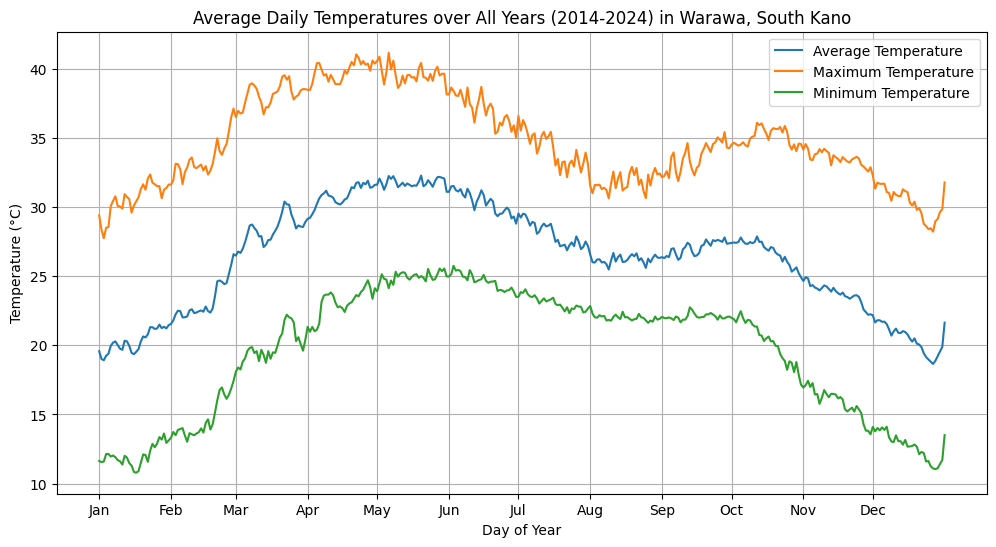

In [29]:
# time series plot of avg, min and max temp where temp on each day has been averaged out over all the years

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average temperature for each day of the year across all years
daily_avg_temp = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)[['Temperature_at_2_Meters_Average_(C)', 'Temperature_at_2_Meters_Maximum_(C)', 'Temperature_at_2_Meters_Minimum_(C)']].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))

plt.plot(daily_avg_temp.index, daily_avg_temp['Temperature_at_2_Meters_Average_(C)'], label='Average Temperature')
plt.plot(daily_avg_temp.index, daily_avg_temp['Temperature_at_2_Meters_Maximum_(C)'], label='Maximum Temperature')
plt.plot(daily_avg_temp.index, daily_avg_temp['Temperature_at_2_Meters_Minimum_(C)'], label='Minimum Temperature')

plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Daily Temperatures over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()


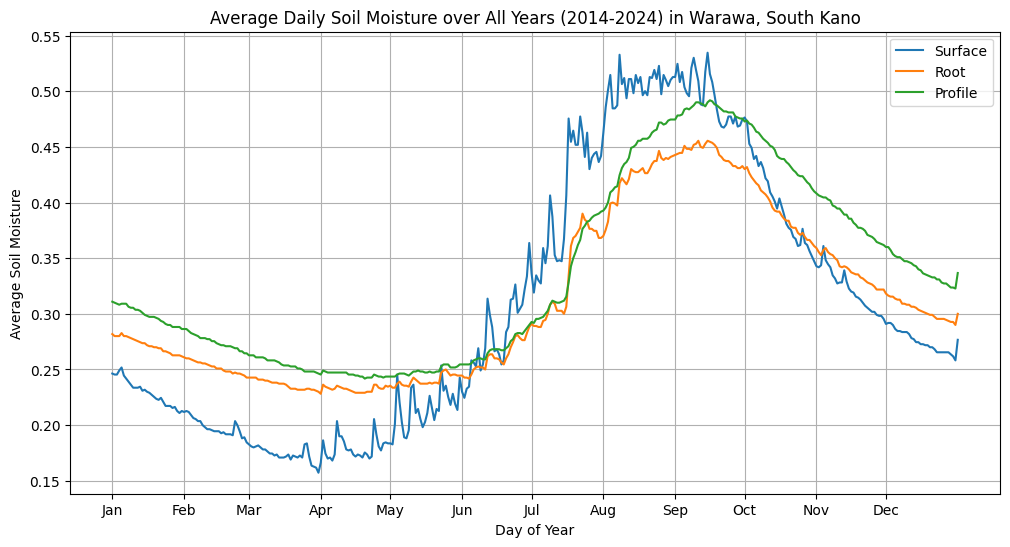

In [30]:
# time series plot of soil moisture where moisture on each day has been averaged out over all the years

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average soil moisture for each day of the year across all years for each soil moisture type
daily_avg_surface = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Surface_Soil_Wetness_(1)'].mean()
daily_avg_root = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Root_Zone_Soil_Wetness_(1)'].mean()
daily_avg_profile = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Profile_Soil_Moisture_(1)'].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_surface.index, daily_avg_surface.values, label='Surface')
plt.plot(daily_avg_root.index, daily_avg_root.values, label='Root')
plt.plot(daily_avg_profile.index, daily_avg_profile.values, label='Profile')
plt.xlabel('Day of Year')
plt.ylabel('Average Soil Moisture')
plt.title('Average Daily Soil Moisture over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()


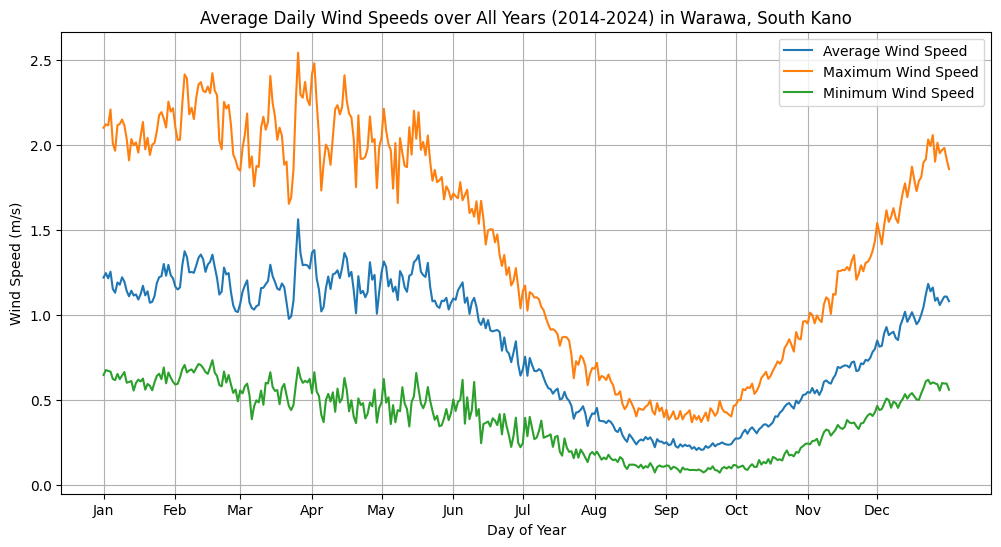

In [31]:
# time series plot of avg, min and max wind speed where wind speed on each day has been averaged out over all the years

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average wind speed for each day of the year across all years for each wind speed type
daily_avg_wind_speed = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)[['Wind_Speed_at_2_Meters_Average_(m/s)', 'Wind_Speed_at_2_Meters_Maximum_(m/s)', 'Wind_Speed_at_2_Meters_Minimum_(m/s)']].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))

plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed['Wind_Speed_at_2_Meters_Average_(m/s)'], label='Average Wind Speed')
plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed['Wind_Speed_at_2_Meters_Maximum_(m/s)'], label='Maximum Wind Speed')
plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed['Wind_Speed_at_2_Meters_Minimum_(m/s)'], label='Minimum Wind Speed')

plt.xlabel('Day of Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Average Daily Wind Speeds over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()


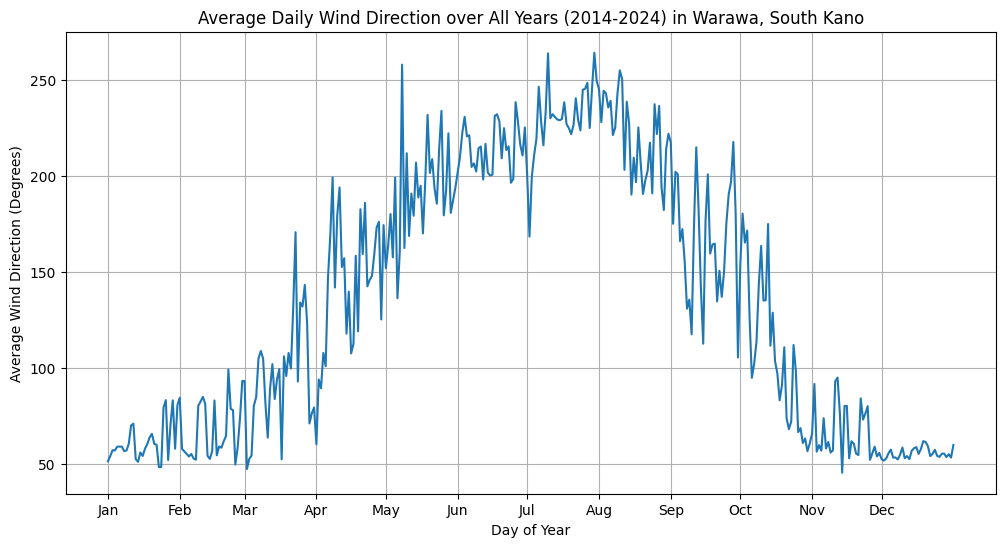

In [32]:
# wind direction for each day averaged over all years

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average wind direction for each day of the year across all years
daily_avg_wind_direction = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Wind_Direction_at_2_Meters_(Degrees)'].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_wind_direction.index, daily_avg_wind_direction.values)
plt.xlabel('Day of Year')
plt.ylabel('Average Wind Direction (Degrees)')
plt.title('Average Daily Wind Direction over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()


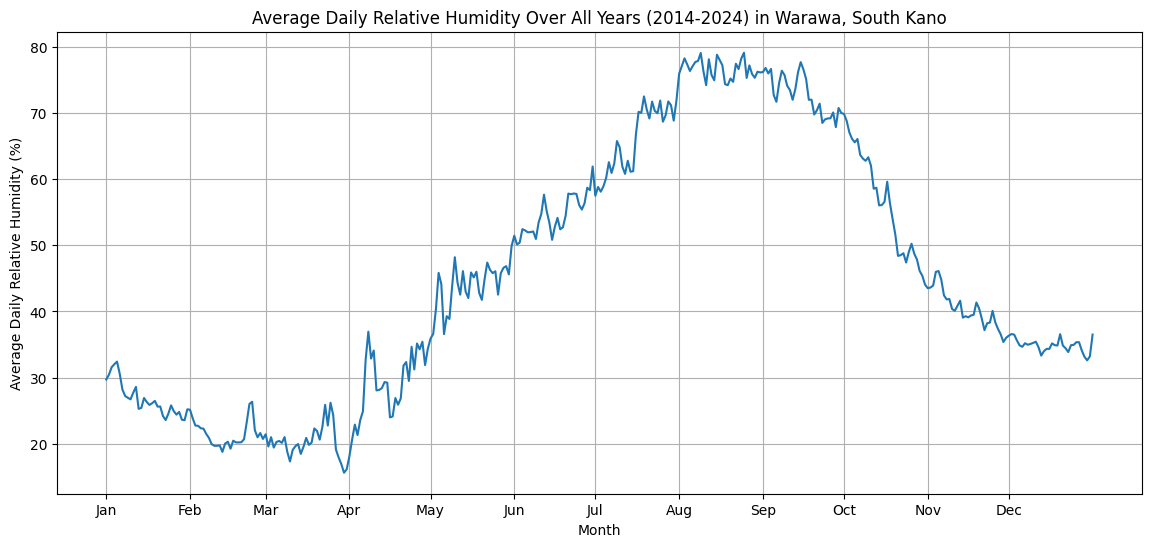

In [33]:
# time series plot of daily relative humidity where humidity on each day has been averaged out over all the years

import matplotlib.pyplot as plt

# Group data by day of year and calculate the mean precipitation
daily_avg_rh = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Relative_Humidity_at_2_Meters_(%)'].mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_rh.index, daily_avg_rh.values)

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)


plt.xlabel('Month')
plt.ylabel('Average Daily Relative Humidity (%)')
plt.title('Average Daily Relative Humidity Over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.show()

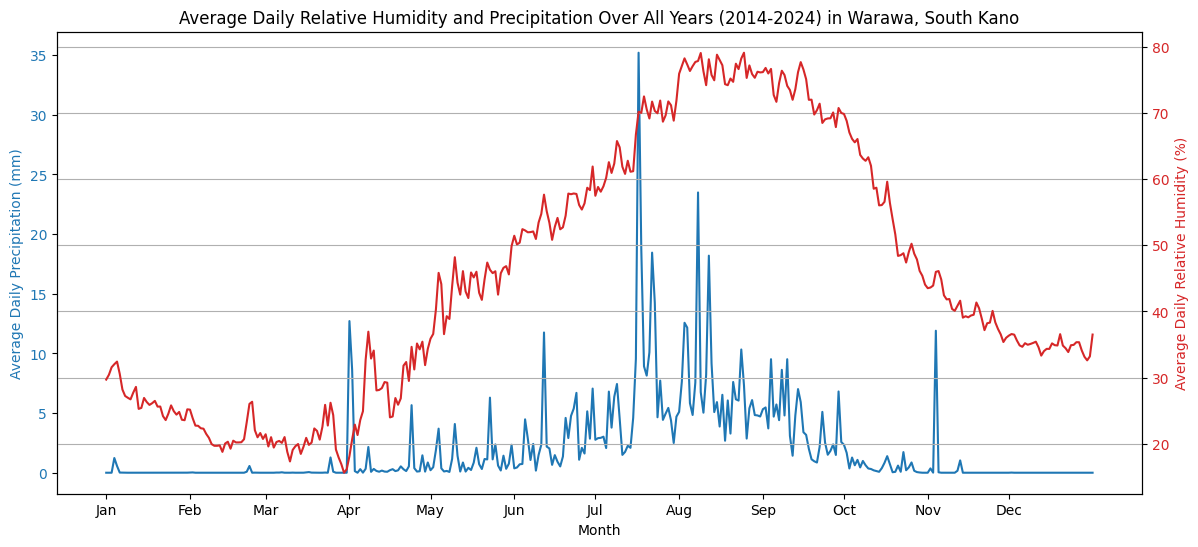

In [34]:
# time series of daily relative humidity and precipitation where each value has been averaged out over all years

import matplotlib.pyplot as plt
# Calculate the average relative humidity and precipitation for each day of the year
daily_avg_rh = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Relative_Humidity_at_2_Meters_(%)'].mean()
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot precipitation on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Daily Precipitation (mm)', color=color)
ax1.plot(daily_avg_precip.index, daily_avg_precip.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for relative humidity
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Daily Relative Humidity (%)', color=color)
ax2.plot(daily_avg_rh.index, daily_avg_rh.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.title('Average Daily Relative Humidity and Precipitation Over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.show()


###Misc

In [43]:
warawa_df['Shower Category'].value_counts()

,count
Shower Category,
negligible rain,2554
light rain,1301
moderate rain,130
heavy rain,29
flooding rain,4


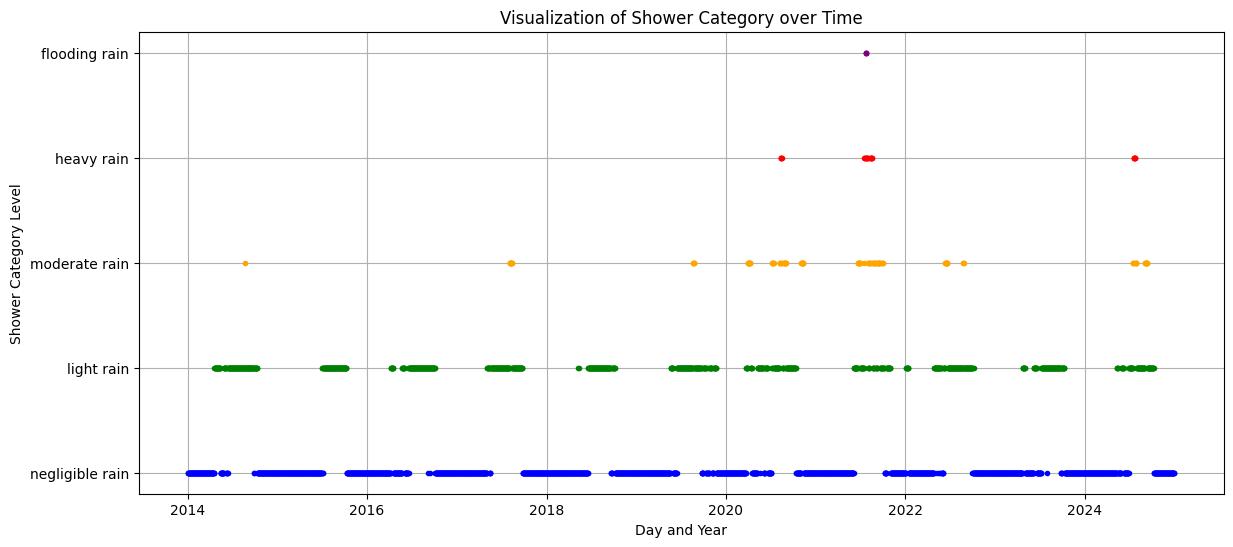

In [101]:
# visualise warawa_df['Shower Category'] using dots at different levels and of different colours. X axis should show day and year

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'warawa_df' is your DataFrame and it has 'Date' and 'Shower Category' columns
# Convert 'Date' column to datetime objects if it's not already
warawa_df['Date'] = pd.to_datetime(warawa_df['Date'])

# Create a dictionary to map shower categories to colors and y-axis levels
category_mapping = {
    'negligible rain': ('blue', 1),
    'light rain': ('green', 2),
    'moderate rain': ('orange', 3),
    'heavy rain': ('red', 4),
    'flooding rain': ('purple', 5)
}

# Create the plot
plt.figure(figsize=(14, 6))

# Iterate through the DataFrame and plot a dot for each row
for index, row in warawa_df.iterrows():
    category = row['Shower Category']
    if category in category_mapping:
        color, level = category_mapping[category]
        plt.plot(row['Date'], level, '.', color=color)

plt.xlabel('Day and Year')
plt.ylabel('Shower Category Level')
plt.title('Visualization of Shower Category over Time')
plt.yticks(list(range(1, 6)), list(category_mapping.keys()))  # Set y-axis ticks to shower categories
plt.grid(True)
plt.show()


In [104]:
# make a new df using daily_avg_precip and add shower category for each date

import pandas as pd
# Assuming daily_avg_precip is the Series you calculated earlier

# Create a new DataFrame from daily_avg_precip
new_df = pd.DataFrame({'Daily_Avg_Precip': daily_avg_precip})

# Reset the index to make 'dayofyear' a column
new_df = new_df.reset_index()

# Define a function to categorize precipitation into shower categories
def categorize_precipitation(precipitation):
  if precipitation <= 1:
    return 'negligible rain'
  elif 1 < precipitation <= 10:
    return 'light rain'
  elif 10 < precipitation <= 25:
    return 'moderate rain'
  elif 25 < precipitation <= 50:
    return 'heavy rain'
  else:
    return 'flooding rain'

# Apply the categorization function to create a new 'Shower Category' column
new_df['Shower Category'] = new_df['Daily_Avg_Precip'].apply(categorize_precipitation)

# Now 'new_df' contains 'dayofyear', 'Daily_Avg_Precip', and 'Shower Category'
print(new_df.head())


   Date  Daily_Avg_Precip  Shower Category
0     1          0.000000  negligible rain
1     2          0.000000  negligible rain
2     3          0.000000  negligible rain
3     4          1.232727       light rain
4     5          0.564545  negligible rain


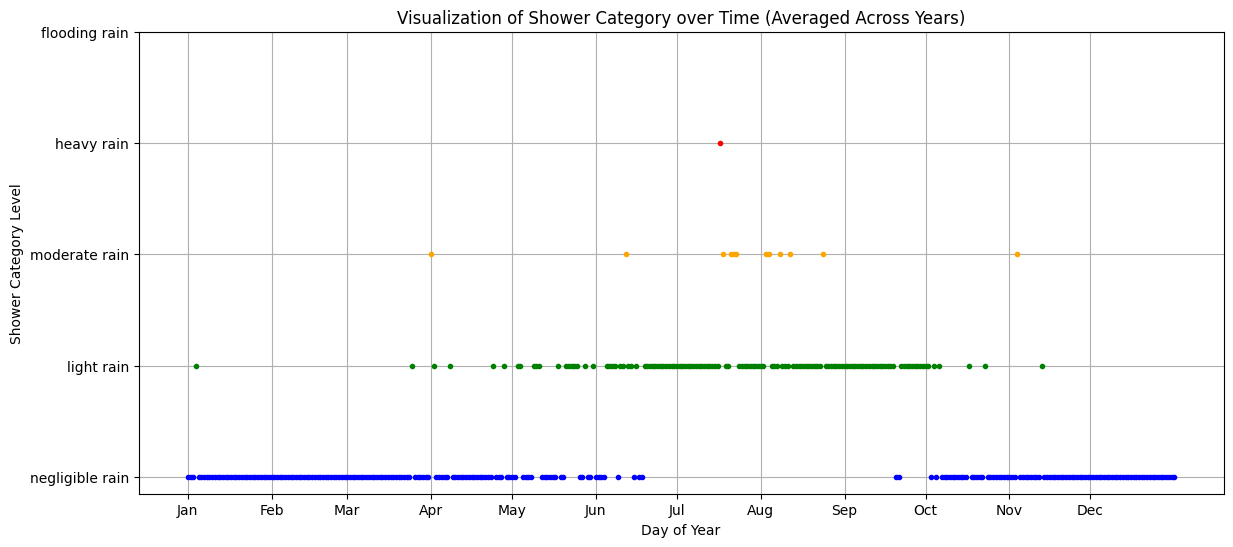

In [111]:
import matplotlib.pyplot as plt
# Assuming 'new_df' is your DataFrame and it has 'dayofyear', 'Daily_Avg_Precip', and 'Shower Category' columns

# Create a dictionary to map shower categories to colors and y-axis levels
category_mapping = {
    'negligible rain': ('blue', 1),
    'light rain': ('green', 2),
    'moderate rain': ('orange', 3),
    'heavy rain': ('red', 4),
    'flooding rain': ('purple', 5)
}

# Create the plot
plt.figure(figsize=(14, 6))

# Iterate through the DataFrame and plot a dot for each row
for index, row in new_df.iterrows():
    category = row['Shower Category']
    if category in category_mapping:
        color, level = category_mapping[category]
        # Access the 'dayofyear' column using the correct column name: 'Date'
        plt.plot(row['Date'], level, '.', color=color) # Changed row['dayofyear'] to row['Date']

plt.xlabel('Day of Year')
plt.ylabel('Shower Category Level')
plt.title('Visualization of Shower Category over Time (Averaged Across Years)')
plt.yticks(list(range(1, 6)), list(category_mapping.keys()))  # Set y-axis ticks to shower categories

# Customize x-axis ticks to show months (similar to previous plots)
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.grid(True)
plt.show()


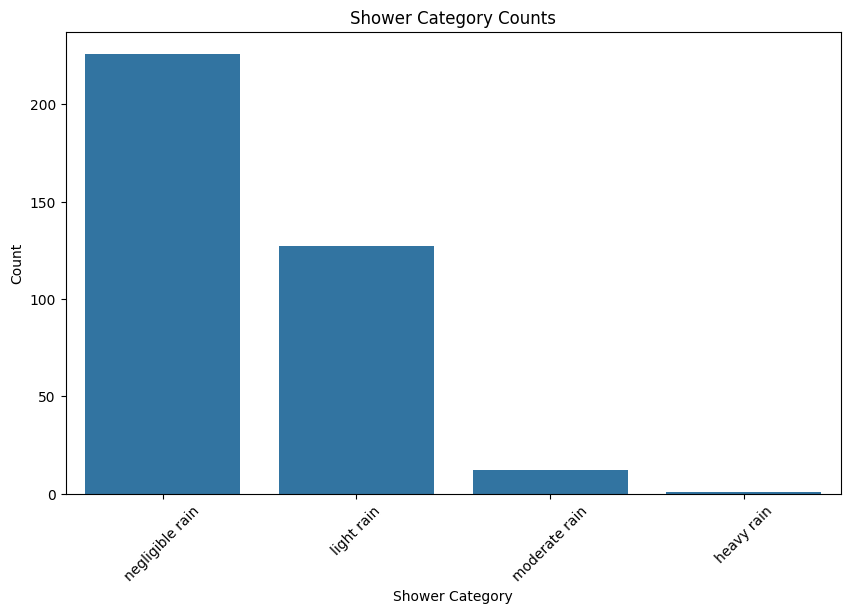

In [112]:
# isualise new_df[shower category].value_counts()

import matplotlib.pyplot as plt
# Assuming 'new_df' is your DataFrame and it has 'Shower Category' column

# Create a bar plot of the value counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Shower Category', data=new_df)
plt.xlabel('Shower Category')
plt.ylabel('Count')
plt.title('Shower Category Counts')
plt.xticks(rotation=45)
plt.show()


In [44]:
# print day of year and year for each day that shows flooding rain

# Assuming warawa_df is your DataFrame and 'Shower Category' column is defined
# as shown in the previous code.

flooding_rain_days = warawa_df[warawa_df['Shower Category'] == 'flooding rain']

# Extract the day of the year and year for each flooding rain day
for index, row in flooding_rain_days.iterrows():
  day_of_year = row['Date'].dayofyear
  year = row['Date'].year
  print(f"Day of Year: {day_of_year}, Year: {year}")


Day of Year: 204, Year: 2021
Day of Year: 205, Year: 2021
Day of Year: 206, Year: 2021
Day of Year: 207, Year: 2021


In [82]:
# create a series with index as day of year - where the value should be the category of rain that has been observed most frequently on that day of the year

import pandas as pd
# Assuming warawa_df is your DataFrame and 'Shower Category' column is defined.

# Convert 'Date' to datetime objects if it's not already
warawa_df['Date'] = pd.to_datetime(warawa_df['Date'])

# Group by day of year and find the most frequent 'Shower Category'
most_frequent_shower_category = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Shower Category'].agg(lambda x: x.value_counts().index[0])

# Create a Series with day of year as index and most frequent shower category as value
most_frequent_shower_category_series = pd.Series(most_frequent_shower_category, name='Most Frequent Shower Category')

most_frequent_shower_category_series.value_counts()


,count
Most Frequent Shower Category,
negligible rain,246
light rain,120


In [70]:
# create a series with index as day of year - where the value should be flooding rain if flooding  rain has been observed on that day even once, heavy rain if heavy rain has been observed on that day 2 or more times, moderate rain if moderate rain has been observed 3 or more times, and light rain if light rain has been observed 5 or more times in the past 11 years

import pandas as pd
# Assuming 'warawa_df' is your DataFrame with 'Date' and 'Shower Category' columns.

# Convert 'Date' to datetime if it's not already.
warawa_df['Date'] = pd.to_datetime(warawa_df['Date'])

# Create an empty series with the day of the year as the index.
rain_series = pd.Series(index=pd.date_range('2014-01-01', '2014-12-31').dayofyear, dtype=str)

# Iterate through each year's data to identify rain occurrences and update the series.
for year in range(2014, 2025):
  yearly_df = warawa_df[warawa_df['Date'].dt.year == year]
  for day in range(1, 367):
    daily_data = yearly_df[yearly_df['Date'].dt.dayofyear == day]
    if not daily_data.empty:
      # Check if flooding rain has been observed on this day.
      if 'flooding rain' in daily_data['Shower Category'].values:
        rain_series.loc[day] = 'flooding rain'

      # Check if heavy rain has been observed 2 or more times on this day.
      elif 'heavy rain' in daily_data['Shower Category'].values:
        if rain_series.loc[day] != 'flooding rain':
          rain_series.loc[day] = 'heavy rain'

      # Check if moderate rain has been observed 3 or more times on this day.
      elif 'moderate rain' in daily_data['Shower Category'].values:
        if rain_series.loc[day] != 'flooding rain' and rain_series.loc[day] != 'heavy rain':
          rain_series.loc[day] = 'moderate rain'

      # Check if light rain has been observed 5 or more times on this day.
      elif 'light rain' in daily_data['Shower Category'].values:
        if rain_series.loc[day] != 'flooding rain' and rain_series.loc[day] != 'heavy rain' and rain_series.loc[day] != 'moderate rain':
          rain_series.loc[day] = 'light rain'

# Fill any remaining NaN values with 'no rain'.
rain_series = rain_series.fillna('no rain')

# Print the series.
rain_series.value_counts()


,count
light rain,136
no rain,114
moderate rain,94
heavy rain,17
flooding rain,4


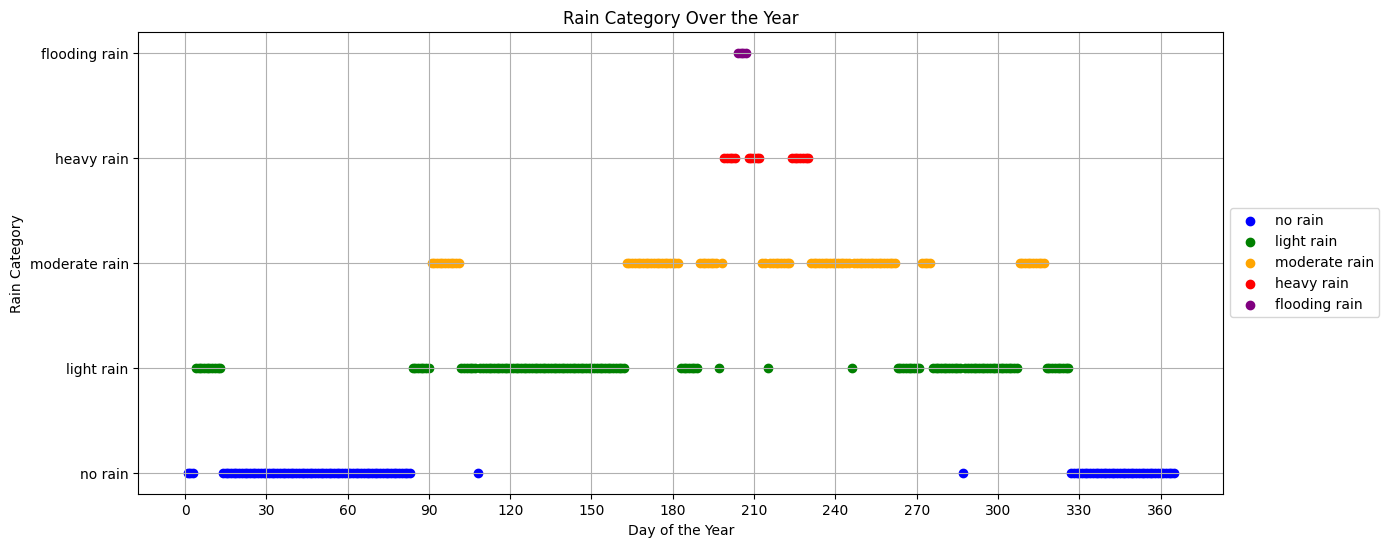

In [71]:
# visualise rain_series with diffferent coloured dots at different heights, add index

import matplotlib.pyplot as plt

# Assuming rain_series is defined as in your previous code

plt.figure(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Iterate through the rain_series and plot dots with different colors and heights based on the category
for day, category in rain_series.items():
  y_value = 0  # Default y-value for 'no rain'
  if category == 'light rain':
    y_value = 1
  elif category == 'moderate rain':
    y_value = 2
  elif category == 'heavy rain':
    y_value = 3
  elif category == 'flooding rain':
    y_value = 4
  plt.scatter(day, y_value, color=colors[category], label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

# Add index (day of the year)
plt.xlabel('Day of the Year')
plt.ylabel('Rain Category')
plt.title('Rain Category Over the Year')
plt.xticks(range(0, 367, 30)) # Adjust spacing of x-axis ticks as needed
plt.yticks([0,1,2,3,4], ['no rain', 'light rain', 'moderate rain', 'heavy rain', 'flooding rain'])
plt.grid(True)

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()


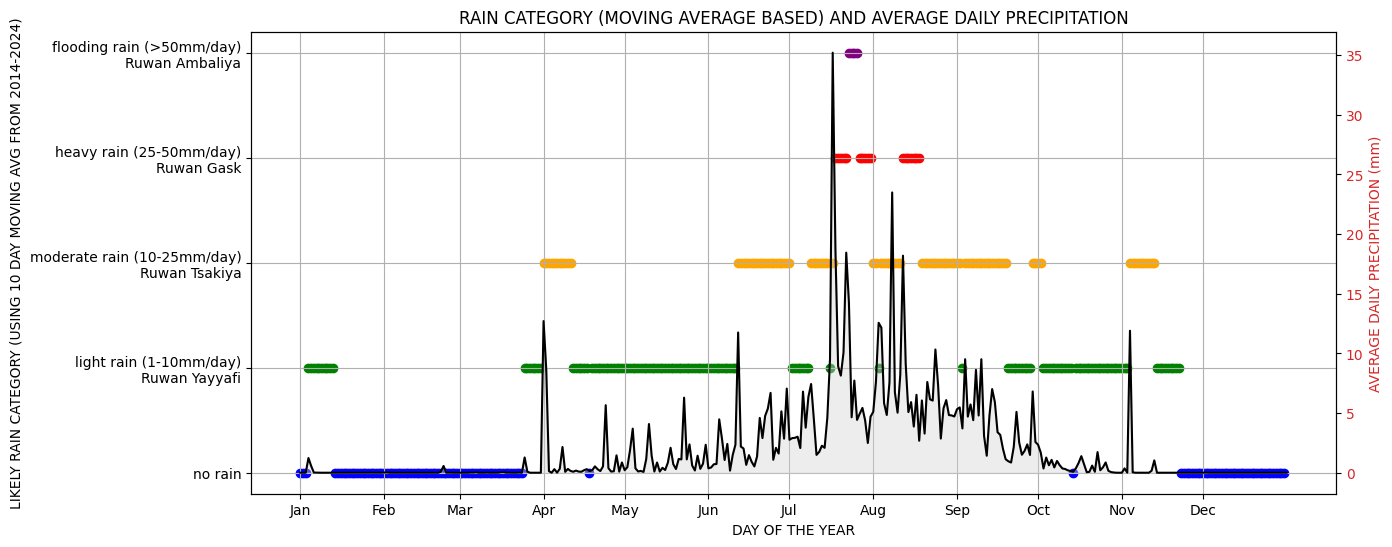

In [72]:
import matplotlib.pyplot as plt
# Assuming rain_series and daily_avg_precip are defined as in your previous code

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Iterate through the rain_series and plot dots with different colors and heights based on the category
for day, category in rain_series.items():
  y_value = 0  # Default y-value for 'no rain'
  if category == 'light rain':
    y_value = 1
  elif category == 'moderate rain':
    y_value = 2
  elif category == 'heavy rain':
    y_value = 3
  elif category == 'flooding rain':
    y_value = 4
  plt.scatter(day, y_value, color=colors[category], label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

# Add index (day of the year)
ax1.set_xlabel('DAY OF THE YEAR')
ax1.set_ylabel('LIKELY RAIN CATEGORY (USING 10 DAY MOVING AVG FROM 2014-2024)')
ax1.set_title('RAIN CATEGORY (MOVING AVERAGE BASED) AND AVERAGE DAILY PRECIPITATION')
ax1.set_xticks(range(0, 367, 30)) # Adjust spacing of x-axis ticks as needed
ax1.set_yticks([0,1,2,3,4], ['no rain', 'light rain (1-10mm/day)\nRuwan Yayyafi', 'moderate rain (10-25mm/day)\nRuwan Tsakiya', 'heavy rain (25-50mm/day)\nRuwan Gask', 'flooding rain (>50mm/day)\nRuwan Ambaliya'])
ax1.grid(True)

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create a second y-axis for daily_avg_precip
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVERAGE DAILY PRECIPITATION (mm)', color=color)
ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)

'''
#legend
handles, labels = ax1.get_legend_handles_labels()
legend_labels = {'flooding rain': 'Ruwan Ambaliya','heavy rain': 'Ruwan Gask','moderate rain': 'Ruwan Tsakiya','light rain': 'Ruwan Yayyafi','no rain': 'No Rain'}
new_labels = [legend_labels.get(label, label) for label in labels]
plt.legend(handles, new_labels)
'''


# Customize x-axis ticks to show month and day of year
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

plt.show()

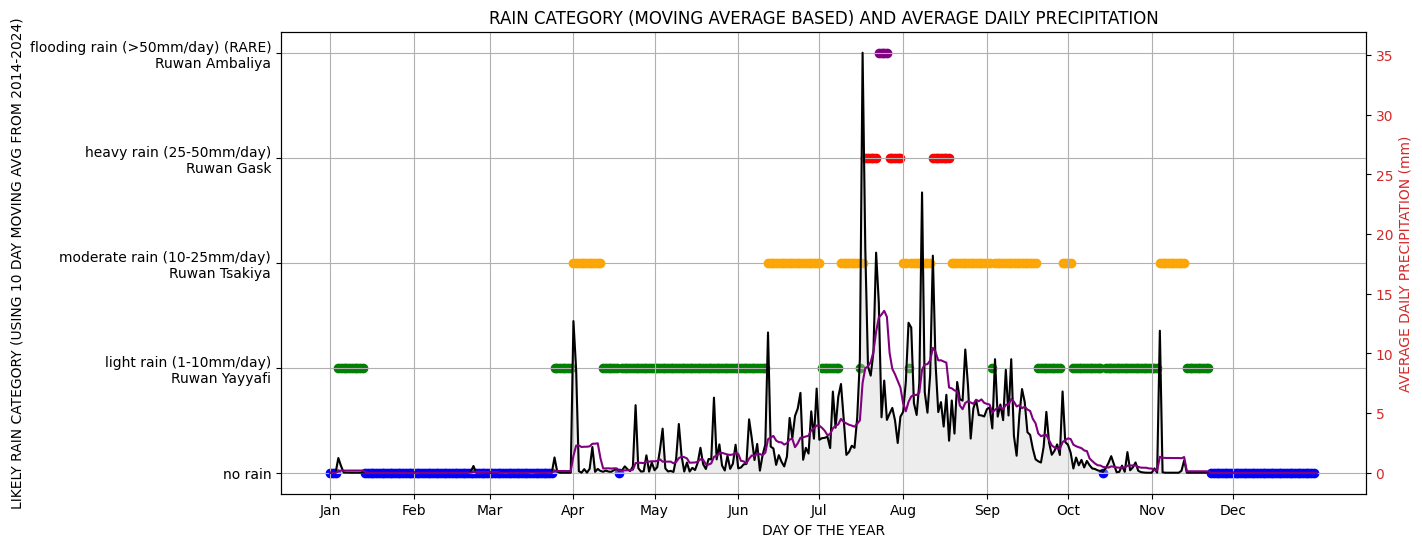

In [75]:
import matplotlib.pyplot as plt
# Assuming rain_series and daily_avg_precip are defined as in your previous code

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Iterate through the rain_series and plot dots with different colors and heights based on the category
for day, category in rain_series.items():
  y_value = 0  # Default y-value for 'no rain'
  if category == 'light rain':
    y_value = 1
  elif category == 'moderate rain':
    y_value = 2
  elif category == 'heavy rain':
    y_value = 3
  elif category == 'flooding rain':
    y_value = 4
  plt.scatter(day, y_value, color=colors[category], label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

# Add index (day of the year)
ax1.set_xlabel('DAY OF THE YEAR')
ax1.set_ylabel('LIKELY RAIN CATEGORY (USING 10 DAY MOVING AVG FROM 2014-2024)')
ax1.set_title('RAIN CATEGORY (MOVING AVERAGE BASED) AND AVERAGE DAILY PRECIPITATION')
ax1.set_xticks(range(0, 367, 30)) # Adjust spacing of x-axis ticks as needed
ax1.set_yticks([0,1,2,3,4], ['no rain', 'light rain (1-10mm/day)\nRuwan Yayyafi', 'moderate rain (10-25mm/day)\nRuwan Tsakiya', 'heavy rain (25-50mm/day)\nRuwan Gask', 'flooding rain (>50mm/day) (RARE)\nRuwan Ambaliya'])
ax1.grid(True)

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create a second y-axis for daily_avg_precip
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVERAGE DAILY PRECIPITATION (mm)', color=color)
ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Group data by day of year and calculate the mean precipitation for 10 day MA
daily_ma_precip_avg = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_MA_10'].mean()

ax2.plot(daily_ma_precip_avg.index, daily_ma_precip_avg.values,color = 'purple')

'''
#legend
handles, labels = ax1.get_legend_handles_labels()
legend_labels = {'flooding rain': 'Ruwan Ambaliya','heavy rain': 'Ruwan Gask','moderate rain': 'Ruwan Tsakiya','light rain': 'Ruwan Yayyafi','no rain': 'No Rain'}
new_labels = [legend_labels.get(label, label) for label in labels]
plt.legend(handles, new_labels)
'''


# Customize x-axis ticks to show month and day of year
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

plt.show()

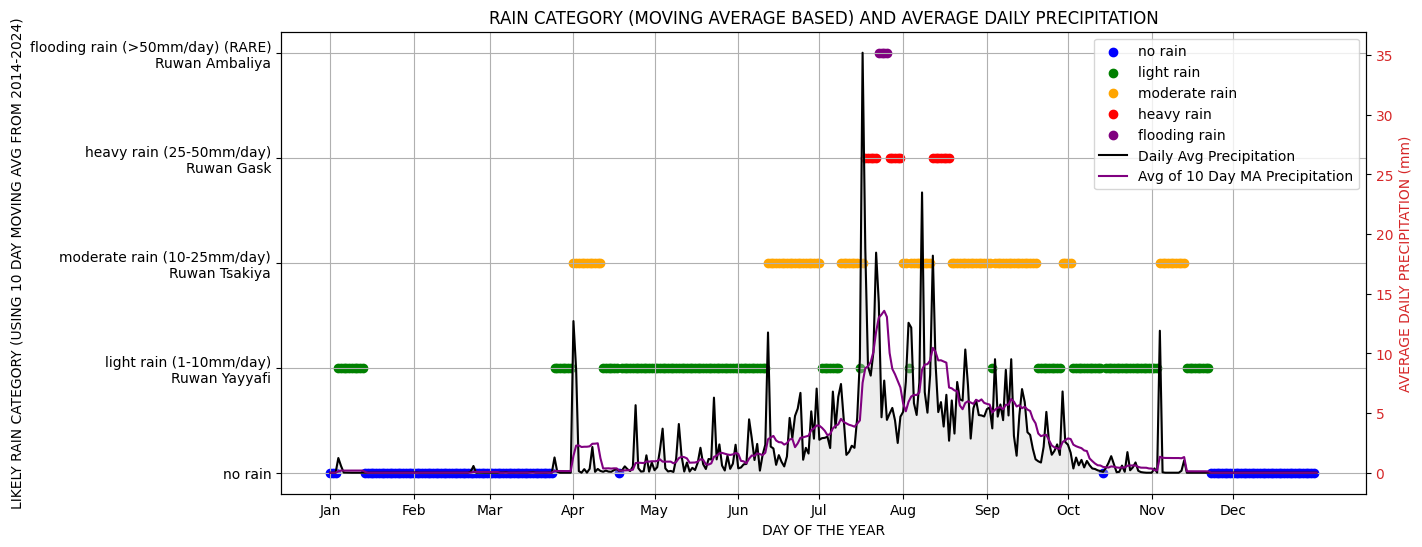

'\nplt.figure(figsize=(10, 5))\nplt.plot(daily_avg_precip)\n\nplt.tight_layout() # Adjust subplot parameters for a tight layout\nplt.show()\n'

In [80]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Plot rain categories as scatter points
for day, category in rain_series.items():
    y_value = 0  # Default y-value for 'no rain'
    if category == 'light rain':
        y_value = 1
    elif category == 'moderate rain':
        y_value = 2
    elif category == 'heavy rain':
        y_value = 3
    elif category == 'flooding rain':
        y_value = 4
    plt.scatter(day, y_value, color=colors[category],
                label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

ax1.set_xlabel('DAY OF THE YEAR')
ax1.set_ylabel('LIKELY RAIN CATEGORY (USING 10 DAY MOVING AVG FROM 2014-2024)')
ax1.set_title('RAIN CATEGORY (MOVING AVERAGE BASED) AND AVERAGE DAILY PRECIPITATION')
ax1.set_xticks(range(0, 367, 30))
ax1.set_yticks([0,1,2,3,4], ['no rain', 'light rain (1-10mm/day)\nRuwan Yayyafi',
                             'moderate rain (10-25mm/day)\nRuwan Tsakiya',
                             'heavy rain (25-50mm/day)\nRuwan Gask',
                             'flooding rain (>50mm/day) (RARE)\nRuwan Ambaliya'])
ax1.grid(True)

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create a second y-axis for daily precipitation values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVERAGE DAILY PRECIPITATION (mm)', color=color)
line1, = ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black', label='Daily Avg Precipitation')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Mean of 10-day moving average precipitation
daily_ma_precip_avg = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Precipitation_MA_10'].mean()
line2, = ax2.plot(daily_ma_precip_avg.index, daily_ma_precip_avg.values, color='purple', label='Precipitation MA Daily Avg')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + [line1, line2], labels1 + ['Daily Avg Precipitation', 'Avg of 10 Day MA Precipitation'],
           loc='upper right', frameon=True)

# Customize x-axis to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

plt.show()

'''
plt.figure(figsize=(10, 5))
plt.plot(daily_avg_precip)

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()
'''

In [ ]:
s = ['0000','0023','01234','32345','0123','02334']



for i in s:

  num = None
  print(i)

  if '0' in i:
    num = 0

  elif '1' in i:
    num = 1

  elif '2' in i:
    num = 2

  elif '3' in i:
    num = 3

  elif '4' in i:
    num = 4

  elif '5' in i:
    num = 5

  print(num)
  print('')